# CAPSTONE PROJECT

####**Nama Peserta: Rahmat Zaki Muharom**

## Connect Colab to GDrive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
path = '/content/gdrive/MyDrive/RMDS_Narasio_Data/Meet 12/Data/Coffee Shop/'

In [4]:
import os
os.listdir(path)

['Data Description.txt',
 'CoffeeShop_Dataset.db',
 'Profiling Customer Coffee Shop Clean.csv',
 'Total Transaksi Customer Coffee Shop Clean.csv',
 'Inventory Coffee Shop Clean.csv']

## IMPORT PACKAGES

In [5]:
import sqlite3
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
import datetime as dt

## Connect SQLite to Python

In [6]:
#membuat variabel untuk mengoneksikan data
conn = sqlite3.connect(path + 'CoffeeShop_Dataset.db')

In [7]:
#membuat variabel cursor untuk dapat memanggil perintah menggunakan SQL
cur = conn.cursor()


In [8]:
#meminta menampilkan list tabel dari data yang diminta
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('sales outlet',),
 ('pastry inventory',),
 ('product',),
 ('generations',),
 ('sales reciepts',),
 ('customer',)]

## Data Preparation Using SQL

Pertama-tama **mengecek** bermacam **variabel/kolom** pada masing-masing tabel yang ada, untuk dilihat & dipertimbangkan apakah ada variabel yang **dapat dikurangi / dieliminasi** berdasarkan **urgensi variabel/kolom** dan **kejelasan keterangan**, yang telah diberikan di guidance capstone project (**poin data understanding*), pada jenis variabel terhadap tabel atau data untuk digunakan ke depannya

####1. Tabel Sales Outlet
Berisikan variabel dan data terkait cabang-cabang outlet

In [9]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel sales outlet
pd.read_sql_query('''SELECT * FROM 'sales outlet' ''', conn)

,sales_outlet_id,sales_outlet_type,store_square_feet,store_address,store_city,store_state_province,store_telephone,store_postal_code,store_longitude,store_latitude,manager,Neighorhood
0,2,warehouse,3400,164-14 Jamaica Ave,Jamaica,NY,972-871-0402,11432,-73.795168,40.705226,NaN,Jamaica
1,3,retail,1300,32-20 Broadway,Long Island City,NY,777-718-3190,11106,-73.924008,40.761196,6.0,Astoria
2,4,retail,1300,604 Union Street,Brooklyn,NY,619-347-5193,11215,-73.983984,40.677645,11.0,Gowanus
3,5,retail,900,100 Church Street,New York,NY,343-212-5151,10007,-74.010130,40.713290,16.0,Lower Manhattan
4,6,retail,1000,122 E Broadway,New York,NY,613-555-4989,10002,-73.992687,40.713852,21.0,Lower East Side
5,7,retail,1200,224 E 57th Street,New York,NY,287-817-2330,10021,-73.960000,40.770000,26.0,Upper East Side
6,8,retail,1500,687 9th Avenue,New York,NY,652-212-7020,10036,-73.990338,40.761887,31.0,Hell's Kitchen
7,9,retail,1700,175 8th Avenue,New York,NY,242-212-0080,10011,-74.000502,40.742760,36.0,Chelsea
8,10,retail,1600,183 W 10th Street,New York,NY,674-646-6434,10014,-74.002722,40.734367,41.0,Greenwich Village


In [10]:
# Setelah melakukan pengecekan & pertimbangan pada variabel dan data yang ada pada tabel, maka hanya diambil 5 variabel dari tabel
# Hal ini dikarenakan variabel store_telephone hingga variabel manager tidak begitu urgen dalam analisis ke depan
# Sedangkan variabel store_state_province & neighborhood telah direpresentasikan oleh variabel store_city,
# dan lebih lanjut variabel store_state_province juga memiliki data yang sama di keseluruhan data yang ada pada tabel sales outlet

# Lalu diinisiasi pembuatan variabel data outlet yang berisikan 5 variabel pada tabel sebagai berikut:
outlet = pd.read_sql_query('''SELECT sales_outlet_id,
                              sales_outlet_type,
                              store_address,
                              store_city
                              FROM 'sales outlet' ''', conn)

In [11]:
# Menjalankan & mengecek kembali variabel
outlet.head(5)

,sales_outlet_id,sales_outlet_type,store_address,store_city
0,2,warehouse,164-14 Jamaica Ave,Jamaica
1,3,retail,32-20 Broadway,Long Island City
2,4,retail,604 Union Street,Brooklyn
3,5,retail,100 Church Street,New York
4,6,retail,122 E Broadway,New York


####2. Tabel Pastry Inventory
Berisikan variabel dan data terkait inventaris pangan / dapur

In [12]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel pastry inventory
pd.read_sql_query('''SELECT * FROM 'pastry inventory' ''', conn)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


In [13]:
# Mengecek isi data yang ada pada variabel sales_outlet_id secara distinct / unik; mengecek berapa banyak outlet yang ada / tersebar pada tabel pastry inventory
pd.read_sql_query('''SELECT DISTINCT sales_outlet_id FROM 'pastry inventory' ''', conn)

,sales_outlet_id
0,3
1,5
2,8


> Setelah mengecek isi variabel sales outlet id, secara distinct / unik, ditemukan bahwa jumlah outlet yang menggunakan ataupun berada dalam inventaris dapur (pastry inventory) hanya berjumlah 3 cabang outlet dengan masing-masing id outlet yakni 3, 5, & 8.

In [14]:
# Mengecek isi data yang ada pada variabel product_id secara distinct / unik; mengecek berapa banyak produk yang ada pada tabel pastry inventory
pd.read_sql_query('''SELECT DISTINCT product_id FROM 'pastry inventory' ''', conn)

,product_id
0,69
1,70
2,71
3,72
4,73


> Sedangkan ditemukan bahwa jumlah produk yang berada dalam inventaris dapur (pastry inventory) yakni berjumlah 5 jenis produk dengan masing-masing id produk yakni 69, 70, 71, 72, & 73

In [15]:
# Mengecek isi data yang ada pada variabel transaction_date secara distinct / unik; mengecek variasi tanggal transaksi yang terjadi pada tabel pastry inventory
pd.read_sql_query('''SELECT DISTINCT transaction_date FROM 'pastry inventory' ''', conn)

,transaction_date
0,4/1/2019
1,4/2/2019
2,4/3/2019
3,4/4/2019
4,4/5/2019
5,4/6/2019
6,4/7/2019
7,4/8/2019
8,4/9/2019
9,4/10/2019


> Dan pada variabel/kolom transaction_date ditemukan bahwa tanggal transaksi terjadi di tahun dan bulan yang sama yakni tahun 2019 & bulan ke-empat (April). Sehingga didapatkan bahwa variasi yang terjadi pada data hanya dalam skala harian yakni 27 hari (tanggal 1 - 27)

In [16]:
# Setelah dilakukan pengecekan & menimbang seluruh varabel yang ada pada tabel pastry inventory, 
# maka diputuskan seluruh data diikutsertakan untuk proses analisis lebih lanjut di tahapan EDA

# Lalu diinisiasi pembuatan variabel data pastry_inv yang memuat seluruh varabel data yang ada pada tabel pastry inventory, sebagai berikut:
pastry_inv = pd.read_sql_query('''SELECT * FROM 'pastry inventory' ''', conn)

In [17]:
# Menjalankan & mengecek kembali variabel
pastry_inv.head(5)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%


####3. Tabel Product
Berisikan variabel dan data terkait informasi produk

In [18]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel product
pd.read_sql_query('''SELECT * FROM 'product' ''', conn)

,product_id,product_group,product_category,product_type,product,product_description,unit_of_measure,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,It's like Carnival in a cup. Clean and smooth.,12 oz,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,Out packed blend of beans that is reminiscent ...,12 oz,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,Our house blend for a good espresso shot.,1 lb,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,Our primium single source of hand roasted beans.,1 lb,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,A smooth cup of coffee any time of day.,1 lb,12.00,$15.00,Y,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,Bursting with chocolate flavour,pump,0.04,$0.80,Y,N,N
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,2 shots of Ouro Brasilerio and pure cane sugar...,6 oz,1.20,$6.00,Y,N,Y
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,From Rio,1.5 oz,0.60,$3.00,Y,N,N
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,Ouro promo,16 oz,0.42,$2.10,Y,Y,N


In [19]:
# Mengecek isi data yang ada pada variabel product_group secara distinct / unik; mengecek berapa banyak macam produk yang ada di level grup produk pada tabel product
pd.read_sql_query('''SELECT DISTINCT product_group FROM 'product' ''', conn)

,product_group
0,Whole Bean/Teas
1,Beverages
2,Add-ons
3,Food
4,Merchandise


> Pada pengecekan data pada variabel product_group, secara distinct / unik, ditemukan bahwa variasi jenis produk pada tingkatan grup produk berjumlah 5 macam grup produk yakni Whole Bean/Teas, Beverages, Add-ons, Food, dan Merchandise

In [20]:
# Mengecek isi data yang ada pada variabel product_category secara distinct / unik; mengecek berapa banyak macam produk yang ada di level kategori produk pada tabel product
pd.read_sql_query('''SELECT DISTINCT product_category FROM 'product' ''', conn)

,product_category
0,Coffee beans
1,Loose Tea
2,Packaged Chocolate
3,Coffee
4,Tea
5,Drinking Chocolate
6,Flavours
7,Bakery
8,Branded


> Ditemukan pada variabel product_category, terdapat variasi jenis produk pada tingkatan kategori produk berjumlah 9 macam kategori produk, yakni mulai dari Coffee beans hingga Branded

In [21]:
# Mengecek isi data yang ada pada variabel product_type secara distinct / unik; mengecek berapa banyak macam produk yang ada di level tipe produk pada tabel product
pd.read_sql_query('''SELECT DISTINCT product_type FROM 'product' ''', conn)

,product_type
0,Organic Beans
1,House blend Beans
2,Espresso Beans
3,Gourmet Beans
4,Premium Beans
5,Green beans
6,Herbal tea
7,Black tea
8,Green tea
9,Chai tea


> Lalu, pada pengecekan data pada variabel product_type, secara distinct / unik, ditemukan bahwa variasi jenis produk pada tingkatan tipe produk terdapat 31 macam tipe produk, yakni mulai dari Organic beans, House blend beans, hingga specialty coffee

In [22]:
# Mengecek isi data yang ada pada variabel unit_of_measure secara distinct / unik; mengecek berapa banyak variasi pengukuran produk pada tabel product
pd.read_sql_query('''SELECT DISTINCT unit_of_measure FROM 'product' ''', conn)

,unit_of_measure
0,12 oz
1,1 lb
2,.5 lb
3,.9 oz
4,1 oz
5,8 oz
6,16 oz
7,24 oz
8,1.5 oz
9,3.0 oz


> Dan untuk pengecekan variabel unit_of_measure, secara distinct / unik, ditemukan bahwa untuk mengukur / menakar berbagai jenis produk yang ada terdapat 13 jenis pengukuran produk & 4 jenis satuan unit takaran (oz, lb, pump, & single).


In [23]:
# Setelah melakukan pengecekan & menimbang berbagai macam variabel dan data yang ada pada tabel,
# maka diputuskan harus mengeliminasi 2 variabel yang (sekiranya) akan menyulitkan analisis ke depannya yakni:
# - Pertama, Variabel product description, karena data yang terdapat pada variabel tersebut merupakan data teks yang terlalu variatif & tidak dapat diukur
# - Kedua, Variabel unit_of_measure, karena jenis & satuan unit takaran terlalu variatif, sehingga untuk melakukan analisis ke depannya akan terlalu sulit

# Lalu diinisiasi pembuatan variabel data product yang berisikan variabel sebagai berikut:
product = pd.read_sql_query('''SELECT product_id,
                              product_group,
                              product_category,
                              product_type,
                              product,
                              current_wholesale_price,
                              current_retail_price,
                              tax_exempt_yn,
                              promo_yn,
                              new_product_yn
                              FROM 'product' ''', conn)

In [24]:
# Menjalankan & mengecek kembali variabel/
product.head(5)

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.40,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.40,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.80,$14.75,Y,N,N
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,16.36,$20.45,Y,N,N
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,12.00,$15.00,Y,N,N


####4. Tabel Generations
Berisikan variabel dan data terkait segmentasi generasi pelanggan

In [25]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel generations
pd.read_sql_query('''SELECT * FROM 'generations' ''', conn)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers
...,...,...
65,2011,Gen Z
66,2012,Gen Z
67,2013,Gen Z
68,2014,Gen Z


In [26]:
# Mengecek isi data yang ada pada variabel generation secara distinct / unik; mengecek berapa banyak variasi generasi yang ada pada tabel generations
pd.read_sql_query('''SELECT DISTINCT generation FROM 'generations' ''', conn)

,generation
0,Baby Boomers
1,Gen X
2,Older Millennials
3,Younger Millennials
4,Gen Z


> Pada pengecekan terhadap variabel generation, secara distinct / unik, ditemukan bahwa terdapat 5 variasi pada generasi yang ada pada tabel generations, yakni mulai dari Baby boomers, Gen X, Older millennials, Younger millenials, dan Gen Z

In [27]:
# Setelah dilakukan pengecekan & menimbang variabel-variabel yang ada pada tabel generations, 
# maka diputuskan untuk mengikutsertakan kedua variabel yang ada pada tabel untuk dilakukan analisa ke depan

# Sehingga diinisiasi pembuatan variabel data gen yang berisikan seluruh variabel yang ada pada tabel generations sebagai berikut:
gen = pd.read_sql_query('''SELECT * FROM 'generations' ''', conn)

In [28]:
# Menjalankan & mengecek kembali variabel
gen.head(5)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers
3,1949,Baby Boomers
4,1950,Baby Boomers


####5. Tabel Customer
Berisikan variabel dan data terkait informasi pribadi pelanggan

In [29]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel customer
pd.read_sql_query('''SELECT * FROM 'customer' ''', conn)

,customer_id,home_store,customer_first-name,customer_email,customer_since,loyalty_card_number,birthdate,gender,birth_year
0,1,3,Kelly Key,Venus@adipiscing.edu,2017-01-04,908-424-2890,1950-05-29,M,1950
1,2,3,Clark Schroeder,Nora@fames.gov,2017-01-07,032-732-6308,1950-07-30,M,1950
2,3,3,Elvis Cardenas,Brianna@tellus.edu,2017-01-10,459-375-9187,1950-09-30,M,1950
3,4,3,Rafael Estes,Ina@non.gov,2017-01-13,576-640-9226,1950-12-01,M,1950
4,5,3,Colin Lynn,Dale@Integer.com,2017-01-15,344-674-6569,1951-02-01,M,1951
...,...,...,...,...,...,...,...,...,...
2241,8497,8,Rae,Kylie@facilisi.org,2017-01-06,081-440-6679,1977-12-10,F,1977
2242,8498,8,April,Daniel@placerat.us,2019-01-20,705-545-5246,2000-12-07,N,2000
2243,8499,8,Clementine,Dieter@ac.us,2017-11-09,297-550-7776,1996-06-04,F,1996
2244,8500,8,Linda,Dillon@pretium.gov,2017-08-21,255-202-7435,1990-03-01,N,1990


In [30]:
# Mengecek isi data yang ada pada variabel home_store secara distinct / unik; mengecek banyak variasi store yang dikunjungi customer pada tabel customer
pd.read_sql_query('''SELECT DISTINCT home_store FROM 'customer' ''', conn)

,home_store
0,3
1,5
2,8


> Pada pengecekan data variabel home_store, ditemukan bahwa terdapat 3 store yang dikunjungi oleh customer, yakni store dengan id 3, 5, dan 8

In [31]:
# Mengecek isi data yang ada pada variabel birth_year secara distinct / unik; mengecek berapa banyak variasi tahun kelahiran dari customer yang ada pada tabel customer
pd.read_sql_query('''SELECT DISTINCT birth_year FROM 'customer' ''', conn)

,birth_year
0,1950
1,1951
2,1952
3,1953
4,1954
5,1955
6,1956
7,1957
8,1958
9,1959


> Lalu, pada pengecekan data variabel customer, ditemukan bahwa terdapat variasi tahun kelahiran customer berjumlah 52 variasi, yakni mulai dari tahun kelahiran 1950 hingga 2001

In [32]:
# Setelah melakukan pengecekan & menimbang seluruh variabel yang ada pada tabel customer,
# maka dilakukan eliminasi terhadap 4 variabel yakni mulai dari customer_email, customer_since, loyalty_card_number, dan birthdate, 
# terkait urgensi & keefektifitasan masing-masing variabel pada proses analisis ke depannya

# Sehingga diinisiasi pembuatan variabel data cust yang berisikan 5 variabel yang ada pada tabel customer sebagai berikut:
cust = pd.read_sql_query('''SELECT customer_id,
                            home_store,
                            "customer_first-name",
                            gender,
                            birth_year
                            FROM 'customer' ''', conn)

In [33]:
# Menjalankan & mengecek kembali variabel
cust.head(5)

,customer_id,home_store,customer_first-name,gender,birth_year
0,1,3,Kelly Key,M,1950
1,2,3,Clark Schroeder,M,1950
2,3,3,Elvis Cardenas,M,1950
3,4,3,Rafael Estes,M,1950
4,5,3,Colin Lynn,M,1951


####6. Tabel Sales Receipt
Berisikan variabel dan data terkait transaksi penjualan kepada pelanggan

In [34]:
# Mengecek seluruh isi variabel dan data yang ada pada tabel sales receipts
pd.read_sql_query('''SELECT * FROM 'sales reciepts' ''', conn)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


In [35]:
# Setelah mengecek & menimbang berbagai variabel yang ada pada tabel reciepts,
# maka dilakukan eliminasi terhadap 5 variabel, yakni transaction_time, staff_id, order, line_item_id, dan line_item_amount
# dikarenakan untuk efisiensi, urgensi, & ketidakjelasan keterangan variabel (yang  telah diberikan di guidance capstone project; order, line_item_id, & line_item_amount)
# terhadap proses analisis ke depannya

# Lalu, diinisiasi pembuatan variabel data receipt yang berisikan 9 variabel yang ada pada tabel reciepts sebagai berikut:
receipt = pd.read_sql_query('''SELECT transaction_id,
                              transaction_date,
                              sales_outlet_id,
                              customer_id,
                              instore_yn,
                              product_id,
                              quantity,
                              unit_price,
                              promo_item_yn
                              FROM 'sales reciepts' ''', conn)

In [36]:
# Menjalankan & mengecek kembali variabel
receipt.head(5)

,transaction_id,transaction_date,sales_outlet_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,7,2019-04-01,3,558,N,52,1,2.50,N
1,11,2019-04-01,3,781,N,27,2,3.50,N
2,19,2019-04-01,3,788,Y,46,2,2.50,N
3,32,2019-04-01,3,683,N,23,2,2.50,N
4,33,2019-04-01,3,99,Y,34,1,2.45,N


####JOINING TABEL
Joining tabel dilakukan untuk mengoneksikan relasi antar dua tabel atau lebih, sehingga diharapkan dapat mempermudah analisis ke depannya

A. Join Tabel 1

In [37]:
# melakukan joining tabel (left join) antara tabel pastry inventory, sales outlet, & product untuk membuat sebuah variabel data inventory yang memuat seluruh data yang berkaitan dengan gudang / inventory
inventory = pd.read_sql_query('''SELECT transaction_date,
                    store_address,
                    store_city,
                    product,
                    current_wholesale_price,
                    current_retail_price,
                    start_of_day,
                    quantity_sold,
                    waste,
                    "% waste"
                    FROM 'pastry inventory'
                    LEFT JOIN 'sales outlet'
                    on 'sales outlet'.sales_outlet_id = 'pastry inventory'.sales_outlet_id
                    LEFT JOIN 'product'
                    on 'product'.product_id = 'pastry inventory'.product_id ''', conn)

In [38]:
inventory.head(5)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%
1,4/1/2019,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%
2,4/1/2019,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%
3,4/1/2019,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%
4,4/1/2019,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%


B. Join Tabel 2

In [39]:
# melakukan joining tabel (left join) antara tabel customer & generations untuk membuat sebuah variabel data yang berisikan profile data customer (generally)
cust_profile = pd.read_sql_query('''SELECT customer_id,
                    "customer_first-name",
                    home_store,
                    gender,
                    generation
                    FROM 'customer'
                    LEFT JOIN 'generations'
                    on 'generations'.birth_year = 'customer'.birth_year ''', conn)

In [40]:
cust_profile.head(5)

,customer_id,customer_first-name,home_store,gender,generation
0,1,Kelly Key,3,M,Baby Boomers
1,2,Clark Schroeder,3,M,Baby Boomers
2,3,Elvis Cardenas,3,M,Baby Boomers
3,4,Rafael Estes,3,M,Baby Boomers
4,5,Colin Lynn,3,M,Baby Boomers


C. Join Tabel 3

In [41]:
# melakukan joining tabel (left join) antara tabel sales, reciepts, product, sales outlet, & customer untuk membuat sebuah variabel yang berisikan data transaksi yang dilakukan di cabang-cabang gerai coffe shop oleh para customer
total_trx = pd.read_sql_query('''SELECT 'customer'.customer_id,
                    transaction_date,
                    store_address,
                    store_city,
                    product_group,
                    product_category,
                    product_type,
                    product,
                    quantity,
                    unit_price,
                    instore_yn,
                    promo_item_yn,
                    new_product_yn,
                    gender,
                    birth_year
                    FROM 'sales reciepts'
                    LEFT JOIN 'product'
                    on 'product'.product_id = 'sales reciepts'.product_id 
                    LEFT JOIN 'sales outlet'
                    on 'sales outlet'.sales_outlet_id = 'sales reciepts'.sales_outlet_id
                    LEFT JOIN 'customer'
                    on 'customer'.customer_id = 'sales reciepts'.customer_id ''', conn)

In [42]:
total_trx.head(5)

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,1983.0
1,781.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,1991.0
2,788.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,1995.0
3,683.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,1999.0
4,99.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,1967.0


## PROBLEM STATEMENT

Berisikan pertanyaan atau goals yang akan dituju berdasarkan beberapa poin utama yakni:
1. **CUSTOMER PROFILING**
- Berapakah rata-rata usia customer?
- Berapakah proporsi generasi dari customer?
- Berapakah proporsi gender dari customer?
- Dari segmentasi generasi & gender, customer mana yang paling gemar melakukan purchasing di coffee shop?
- Berdasarkan segmentasi generasi & gender, customer mana yang paling gemar membeli kopi?
- Apakah berdasarkan segmentasi generasi & gender, customer dengan generasi Younger Millenials dan berjenis kelamin wanita merupakan yang paling suka menggunakan promo?
- Bagaimanakah distribusi customer yang membeli langsung di tempat (in store) dari segmentasi generasi & gender?
- Customer manakah yang paling gemar membeli new product, berdasarkan segmentasi generasi & gender?


2. **TRANSAKSI PENJUALAN**
- Pada tanggal berapakah transaksi paling banyak dilakukan?
- Pada tanggal berapa transaksi pembelian oleh customer yang menggunakan promo paling banyak dilakukan?
- Di outlet manakah (city & address) transaksi pembelian terbanyak dilakukan?
- Berapa banyak terjadinya transaksi dilakukan di tempat (in store) oleh customer?


3. **PRODUCT RECOMMENDATION**
- Grup, kategori, & tipe produk mana saja kah yang menjadi top purchase oleh customer?
- Rata-rata kategori produk apa yang paling banyak dibeli oleh para customer?
- Produk apa sajakah yang menjadi Top 3 dibeli oleh para customer?
- Produk apa yang menjadi produk terlaris berdasarkan masing-masing store?
- Berdasarkan harga produknya, kategori produk apa yang paling banyak dibeli oleh customer?


4. **OPTIMALISASI INVENTORY**
- Pada tanggal berapakah terjadi persentase waste tertinggi?
- Product apakah yang memiliki persentase waste tertinggi?
- Berapakah persentase waste tertinggi berdasarkan store city & address?
- Berapa banyak nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi?


## DATA CLEANSING

1. Data Tabel Outlet

In [43]:
outlet

,sales_outlet_id,sales_outlet_type,store_address,store_city
0,2,warehouse,164-14 Jamaica Ave,Jamaica
1,3,retail,32-20 Broadway,Long Island City
2,4,retail,604 Union Street,Brooklyn
3,5,retail,100 Church Street,New York
4,6,retail,122 E Broadway,New York
5,7,retail,224 E 57th Street,New York
6,8,retail,687 9th Avenue,New York
7,9,retail,175 8th Avenue,New York
8,10,retail,183 W 10th Street,New York


In [44]:
#mengecek & memastikan keterangan tipe data sesuai yang seharusnya
outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales_outlet_id    9 non-null      int64 
 1   sales_outlet_type  9 non-null      object
 2   store_address      9 non-null      object
 3   store_city         9 non-null      object
dtypes: int64(1), object(3)
memory usage: 416.0+ bytes


In [45]:
#data ID harus tipe data object/string; mengganti tipe data ke string
outlet['sales_outlet_id'] = outlet['sales_outlet_id'].astype(str)

In [46]:
#mengecek kembali
outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sales_outlet_id    9 non-null      object
 1   sales_outlet_type  9 non-null      object
 2   store_address      9 non-null      object
 3   store_city         9 non-null      object
dtypes: object(4)
memory usage: 416.0+ bytes


In [47]:
#mengecek missing values pada data
pd.isnull(outlet).sum()

sales_outlet_id      0
sales_outlet_type    0
store_address        0
store_city           0
dtype: int64

In [48]:
#mengecek duplikasi data pada data ID
outlet[outlet.duplicated(keep=False)].sort_values("sales_outlet_id")

,sales_outlet_id,sales_outlet_type,store_address,store_city


2. Data Tabel Product

In [49]:
product.head(3)

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.4,$18.00,Y,N,N
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.4,$18.00,Y,N,N
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.8,$14.75,Y,N,N


In [50]:
#mengecek & memastikan keterangan tipe data sesuai yang seharusnya
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     int64  
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   current_wholesale_price  88 non-null     float64
 6   current_retail_price     88 non-null     object 
 7   tax_exempt_yn            88 non-null     object 
 8   promo_yn                 88 non-null     object 
 9   new_product_yn           88 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.0+ KB


In [51]:
#data ID harus bertipe data object / string; mengganti tipe data ke string
product['product_id'] = product['product_id'].astype(str)

In [52]:
#mengecek kembali tipe data
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               88 non-null     object 
 1   product_group            88 non-null     object 
 2   product_category         88 non-null     object 
 3   product_type             88 non-null     object 
 4   product                  88 non-null     object 
 5   current_wholesale_price  88 non-null     float64
 6   current_retail_price     88 non-null     object 
 7   tax_exempt_yn            88 non-null     object 
 8   promo_yn                 88 non-null     object 
 9   new_product_yn           88 non-null     object 
dtypes: float64(1), object(9)
memory usage: 7.0+ KB


In [53]:
#menghilangkan simbol dolar ($) pada data, mengubah tipe data menjadi float, dan menambahkan kolom baru 'current_retail_price_value'
product['current_retail_price_value'] = product['current_retail_price'].apply(lambda x: float(x[1:]))

In [54]:
#mengubah data 'Y' menjadi '1' & 'N' menjadi '0'
product[['tax_exempt_yn', 'promo_yn', 'new_product_yn']] = product[['tax_exempt_yn', 'promo_yn', 'new_product_yn']].replace(['Y','N'], [1, 0])

In [55]:
#mengecek perubahan & penambahan kolom pada data
product.head(3)

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.4,$18.00,1,0,0,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.4,$18.00,1,0,0,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.8,$14.75,1,0,0,14.75


In [56]:
#memastikan kembali tipe data telah berubah & sesuai
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  88 non-null     object 
 1   product_group               88 non-null     object 
 2   product_category            88 non-null     object 
 3   product_type                88 non-null     object 
 4   product                     88 non-null     object 
 5   current_wholesale_price     88 non-null     float64
 6   current_retail_price        88 non-null     object 
 7   tax_exempt_yn               88 non-null     int64  
 8   promo_yn                    88 non-null     int64  
 9   new_product_yn              88 non-null     int64  
 10  current_retail_price_value  88 non-null     float64
dtypes: float64(2), int64(3), object(6)
memory usage: 7.7+ KB


In [57]:
#mengecek missing values pada data
pd.isnull(product).sum()

product_id                    0
product_group                 0
product_category              0
product_type                  0
product                       0
current_wholesale_price       0
current_retail_price          0
tax_exempt_yn                 0
promo_yn                      0
new_product_yn                0
current_retail_price_value    0
dtype: int64

In [58]:
#mengecek duplikasi data pada data ID
product[product.duplicated(keep=False)].sort_values("product_id")

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value


3. Data Tabel Pastry Inventory

In [59]:
pastry_inv.head(3)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%


In [60]:
#mengecek & memastikan keterangan tipe data sesuai yang seharusnya
pastry_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    int64 
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    int64 
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.9+ KB


In [61]:
#mengubah tipe data ID menjadi tipe data object / string
pastry_inv[['sales_outlet_id', 'product_id']] = pastry_inv[['sales_outlet_id', 'product_id']].astype(str)

In [62]:
#memastikan kembali tipe data telah berubah
pastry_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sales_outlet_id   307 non-null    object
 1   transaction_date  307 non-null    object
 2   product_id        307 non-null    object
 3   start_of_day      307 non-null    int64 
 4   quantity_sold     307 non-null    int64 
 5   waste             307 non-null    int64 
 6   % waste           307 non-null    object
dtypes: int64(3), object(4)
memory usage: 16.9+ KB


In [63]:
#mengubah tipe data transaction_date menjadi datetime
pastry_inv['transaction_date'] = pd.to_datetime(pastry_inv['transaction_date'])

In [64]:
#memastikan kembali tipe data telah berubah
pastry_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 16.9+ KB


In [65]:
#membuat variabel baru 'waste_percentage' & mendrop simbol persen (%) dari data '% waste'
pastry_inv['waste_percentage'] = pastry_inv['% waste'].replace({'%': ''}, regex=True)

In [66]:
#memastikan kembali data transaction_date telah berubah menjadi dalam format tampilan datetime & memastikan simbol persen (%) telah terdrop
pastry_inv.head(3)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,waste_percentage
0,3,2019-04-01,69,18,8,10,56%,56
1,3,2019-04-01,70,18,12,6,33%,33
2,3,2019-04-01,71,18,8,10,56%,56


In [67]:
#mengecek kembali tipe data waste_percentage
pastry_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
 7   waste_percentage  307 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 19.3+ KB


In [68]:
#mengubah tipe data waste_percentage menjadi tipe data integer 
pastry_inv['waste_percentage'] = pastry_inv['waste_percentage'].astype(int)

In [69]:
#mengecek kembali perubahan & kesesuiaian tipe data
pastry_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    object        
 1   transaction_date  307 non-null    datetime64[ns]
 2   product_id        307 non-null    object        
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
 7   waste_percentage  307 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 19.3+ KB


In [70]:
#mengecek missing values pada data
pd.isnull(pastry_inv).sum()

sales_outlet_id     0
transaction_date    0
product_id          0
start_of_day        0
quantity_sold       0
waste               0
% waste             0
waste_percentage    0
dtype: int64

4. Data Tabel Generations

In [71]:
gen.head(3)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers
2,1948,Baby Boomers


In [72]:
#mengecek & memastikan tipe data sesuai yang seharusnya
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     int64 
 1   generation  70 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [73]:
#mengubah tipe data birth_year menjadi tipe data object / string
gen['birth_year'] = gen['birth_year'].astype(str)

In [74]:
#memastikan kembali perubahan & kesesuaian tipe data
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   birth_year  70 non-null     object
 1   generation  70 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [75]:
#mengecek missing values pada data
pd.isnull(gen).sum()

birth_year    0
generation    0
dtype: int64

5. Data Tabel Customer

In [76]:
cust.head(3)

,customer_id,home_store,customer_first-name,gender,birth_year
0,1,3,Kelly Key,M,1950
1,2,3,Clark Schroeder,M,1950
2,3,3,Elvis Cardenas,M,1950


In [77]:
#mengecek & memastikan tipe data sesuai yang seharusnya
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   home_store           2246 non-null   int64 
 2   customer_first-name  2246 non-null   object
 3   gender               2246 non-null   object
 4   birth_year           2246 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 87.9+ KB


In [78]:
#mengubah tipe data menjadi tipe data object / string
cust[['customer_id', 'home_store', 'birth_year']] = cust[['customer_id', 'home_store', 'birth_year']].astype(str)

In [79]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   object
 1   home_store           2246 non-null   object
 2   customer_first-name  2246 non-null   object
 3   gender               2246 non-null   object
 4   birth_year           2246 non-null   object
dtypes: object(5)
memory usage: 87.9+ KB


In [80]:
#mengecek missing values pada data
pd.isnull(cust).sum()

customer_id            0
home_store             0
customer_first-name    0
gender                 0
birth_year             0
dtype: int64

In [81]:
#mengecek duplikasi pada data
cust[cust.duplicated(keep=False)].sort_values("customer_id")

,customer_id,home_store,customer_first-name,gender,birth_year


6. Data Tabel Receipts

In [82]:
receipt.head(3)

,transaction_id,transaction_date,sales_outlet_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,7,2019-04-01,3,558,N,52,1,2.5,N
1,11,2019-04-01,3,781,N,27,2,3.5,N
2,19,2019-04-01,3,788,Y,46,2,2.5,N


In [83]:
#mengecek & memastikan tipe data sesuai yang seharusnya
receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  int64  
 1   transaction_date  49894 non-null  object 
 2   sales_outlet_id   49894 non-null  int64  
 3   customer_id       49894 non-null  int64  
 4   instore_yn        49894 non-null  object 
 5   product_id        49894 non-null  int64  
 6   quantity          49894 non-null  int64  
 7   unit_price        49894 non-null  float64
 8   promo_item_yn     49894 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB


In [84]:
#mengubah tipe data ID menjadi tipe data object / string
receipt[['transaction_id', 'sales_outlet_id', 'customer_id', 'product_id']] = receipt[['transaction_id', 'sales_outlet_id', 'customer_id', 'product_id']].astype(str)

In [85]:
#memastikan kembali tipe data telah berubah
receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    49894 non-null  object 
 1   transaction_date  49894 non-null  object 
 2   sales_outlet_id   49894 non-null  object 
 3   customer_id       49894 non-null  object 
 4   instore_yn        49894 non-null  object 
 5   product_id        49894 non-null  object 
 6   quantity          49894 non-null  int64  
 7   unit_price        49894 non-null  float64
 8   promo_item_yn     49894 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


In [86]:
#mengubah tipe data transaction_date menjadi datetime
receipt['transaction_date'] = pd.to_datetime(receipt['transaction_date'])

In [87]:
#mengubah data 'Y' menjadi '1' & 'N' menjadi '0'
receipt[['instore_yn', 'promo_item_yn']] = receipt[['instore_yn', 'promo_item_yn']].replace(['Y','N'], [1, 0])

In [88]:
#mengubah tipe data 'YN' menjadi tipe data object / string
receipt[['instore_yn', 'promo_item_yn']] = receipt[['instore_yn', 'promo_item_yn']].astype(str)

In [89]:
#memastikan perubahan dan kesesuaian tipe data transaction_date, instore_yn, & promo_item_yn
receipt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    49894 non-null  object        
 1   transaction_date  49894 non-null  datetime64[ns]
 2   sales_outlet_id   49894 non-null  object        
 3   customer_id       49894 non-null  object        
 4   instore_yn        49894 non-null  object        
 5   product_id        49894 non-null  object        
 6   quantity          49894 non-null  int64         
 7   unit_price        49894 non-null  float64       
 8   promo_item_yn     49894 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 3.4+ MB


In [90]:
#mengecek dan memastikan perubahan tampilan format datetime pada transaction_date & tampilan data pada instore_yn, promo_item_yn 
receipt.head(3)

,transaction_id,transaction_date,sales_outlet_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,7,2019-04-01,3,558,0,52,1,2.5,0
1,11,2019-04-01,3,781,0,27,2,3.5,0
2,19,2019-04-01,3,788,1,46,2,2.5,0


In [91]:
#mengecek missing values pada data
pd.isnull(receipt).sum()

transaction_id      0
transaction_date    0
sales_outlet_id     0
customer_id         0
instore_yn          0
product_id          0
quantity            0
unit_price          0
promo_item_yn       0
dtype: int64

In [92]:
#mengecek duplikasi pada data
receipt[receipt.duplicated(keep=False)].sort_values("transaction_id")

,transaction_id,transaction_date,sales_outlet_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
11380,10,2019-04-08,3,565,1,41,1,4.25,0
11379,10,2019-04-08,3,565,1,41,1,4.25,0
11376,10,2019-04-08,3,565,1,41,1,4.25,0
11513,102,2019-04-08,3,142,0,60,1,3.75,0
11511,102,2019-04-08,3,142,0,60,1,3.75,0
...,...,...,...,...,...,...,...,...,...
11486,85,2019-04-08,3,0,0,38,1,3.75,0
23004,9,2019-04-14,8,0,0,78,1,4.50,0
23003,9,2019-04-14,8,0,0,78,1,4.50,0
13336,97,2019-04-09,3,0,0,40,1,3.75,0


> transaction_id terdeteksi sebagai duplikat bukan berarti terduplikasi, hal ini dikarenakan terjadinya setiap transaksi dapat memiliki lebih dari 1 produk (product_id)

7. Data Tabel (Join) Inventory

In [93]:
inventory.head(3)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,4/1/2019,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%
1,4/1/2019,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%
2,4/1/2019,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%


In [94]:
#memastikan tipe data sesuai yang seharusnya
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_date         307 non-null    object 
 1   store_address            307 non-null    object 
 2   store_city               307 non-null    object 
 3   product                  307 non-null    object 
 4   current_wholesale_price  307 non-null    float64
 5   current_retail_price     307 non-null    object 
 6   start_of_day             307 non-null    int64  
 7   quantity_sold            307 non-null    int64  
 8   waste                    307 non-null    int64  
 9   % waste                  307 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 24.1+ KB


In [95]:
#mengubah tipe data transaction_date menjadi datetime
inventory['transaction_date'] = pd.to_datetime(inventory['transaction_date'])

In [96]:
#mengecek perubahan pada tipe data transaction_date
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_date         307 non-null    datetime64[ns]
 1   store_address            307 non-null    object        
 2   store_city               307 non-null    object        
 3   product                  307 non-null    object        
 4   current_wholesale_price  307 non-null    float64       
 5   current_retail_price     307 non-null    object        
 6   start_of_day             307 non-null    int64         
 7   quantity_sold            307 non-null    int64         
 8   waste                    307 non-null    int64         
 9   % waste                  307 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 24.1+ KB


In [97]:
#memastikan perubahan tampilan format datetime pada transaction_date
inventory.head(3)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%


In [98]:
#menghilangkan simbol dolar ($) pada data, mengubah tipe data menjadi float, dan menambahkan kolom baru 'current_retail_price_value'
inventory['current_retail_price_value'] = inventory['current_retail_price'].apply(lambda x: float(x[1:]))

In [99]:
#menambahkan kolom & mendrop simbol persen (%) pada data '% waste'
inventory['waste_percentage'] = inventory['% waste'].replace({'%': ''}, regex=True)

In [100]:
#memastikan perubahan dan penambahan kolom current_retail_price_value, wste_percentage
inventory.head(3)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56


In [101]:
#mengecek & memastikan tipe data sesuai dengan ketentuan / yang seharusnya
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transaction_date            307 non-null    datetime64[ns]
 1   store_address               307 non-null    object        
 2   store_city                  307 non-null    object        
 3   product                     307 non-null    object        
 4   current_wholesale_price     307 non-null    float64       
 5   current_retail_price        307 non-null    object        
 6   start_of_day                307 non-null    int64         
 7   quantity_sold               307 non-null    int64         
 8   waste                       307 non-null    int64         
 9   % waste                     307 non-null    object        
 10  current_retail_price_value  307 non-null    float64       
 11  waste_percentage            307 non-null    object        

In [102]:
#mengubah tipe data waste_percentage menjadi tipe data integer
inventory['waste_percentage'] = inventory['waste_percentage'].astype(int)

In [103]:
#mengecek & memastikan kembali tipe data sesuai dengan ketentuan / yang seharusnya
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   transaction_date            307 non-null    datetime64[ns]
 1   store_address               307 non-null    object        
 2   store_city                  307 non-null    object        
 3   product                     307 non-null    object        
 4   current_wholesale_price     307 non-null    float64       
 5   current_retail_price        307 non-null    object        
 6   start_of_day                307 non-null    int64         
 7   quantity_sold               307 non-null    int64         
 8   waste                       307 non-null    int64         
 9   % waste                     307 non-null    object        
 10  current_retail_price_value  307 non-null    float64       
 11  waste_percentage            307 non-null    int64         

In [104]:
#mengecek missing values pada data
pd.isnull(inventory).sum()

transaction_date              0
store_address                 0
store_city                    0
product                       0
current_wholesale_price       0
current_retail_price          0
start_of_day                  0
quantity_sold                 0
waste                         0
% waste                       0
current_retail_price_value    0
waste_percentage              0
dtype: int64

In [105]:
#mengecek duplikasi pada data
inventory[inventory.duplicated(keep=False)]

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage


8. Data Tabel (Join) Customer Profile

In [106]:
cust_profile.head(3)

,customer_id,customer_first-name,home_store,gender,generation
0,1,Kelly Key,3,M,Baby Boomers
1,2,Clark Schroeder,3,M,Baby Boomers
2,3,Elvis Cardenas,3,M,Baby Boomers


In [107]:
#mengecek kesesuaian tipe data
cust_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   int64 
 1   customer_first-name  2246 non-null   object
 2   home_store           2246 non-null   int64 
 3   gender               2246 non-null   object
 4   generation           2246 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.9+ KB


In [108]:
#mengubah data menjadi tipe data object / string
cust_profile[['customer_id', 'home_store']] = cust_profile[['customer_id', 'home_store']].astype(str)

In [109]:
#memasstikan tipe data telah berubah & sesuai
cust_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   object
 1   customer_first-name  2246 non-null   object
 2   home_store           2246 non-null   object
 3   gender               2246 non-null   object
 4   generation           2246 non-null   object
dtypes: object(5)
memory usage: 87.9+ KB


In [110]:
#mengecek missing values pada data
pd.isnull(cust_profile).sum()

customer_id            0
customer_first-name    0
home_store             0
gender                 0
generation             0
dtype: int64

In [111]:
cust_profile[cust_profile.duplicated(keep=False)]

,customer_id,customer_first-name,home_store,gender,generation


9. Data Tabel (Join) Total Transaksi

In [112]:
total_trx

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,1983.0
1,781.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,1991.0
2,788.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,1995.0
3,683.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,1999.0
4,99.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,1,3.00,N,N,N,None,NaN
49890,8412.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,1953.0
49891,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Sm,1,2.20,Y,N,N,None,NaN
49892,8030.0,2019-04-29,687 9th Avenue,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,1994.0


In [113]:
#mengecek kesesuaian masing-masing tipe data
total_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       24852 non-null  float64
 1   transaction_date  49894 non-null  object 
 2   store_address     49894 non-null  object 
 3   store_city        49894 non-null  object 
 4   product_group     49894 non-null  object 
 5   product_category  49894 non-null  object 
 6   product_type      49894 non-null  object 
 7   product           49894 non-null  object 
 8   quantity          49894 non-null  int64  
 9   unit_price        49894 non-null  float64
 10  instore_yn        49894 non-null  object 
 11  promo_item_yn     49894 non-null  object 
 12  new_product_yn    49894 non-null  object 
 13  gender            24852 non-null  object 
 14  birth_year        24852 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 5.7+ MB


In [114]:
#mengubah tipe data transaction_date menjadi datetime
total_trx['transaction_date'] = pd.to_datetime(total_trx['transaction_date'])

In [115]:
#mengubah data 'Y' menjadi '1' & 'N' menjadi '0'
total_trx[['instore_yn', 'promo_item_yn', 'new_product_yn']] = total_trx[['instore_yn', 'promo_item_yn', 'new_product_yn']].replace(['Y','N'], [1, 0])

In [116]:
#memastikan tipe data telah diubah & disesuaikan
total_trx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       24852 non-null  float64       
 1   transaction_date  49894 non-null  datetime64[ns]
 2   store_address     49894 non-null  object        
 3   store_city        49894 non-null  object        
 4   product_group     49894 non-null  object        
 5   product_category  49894 non-null  object        
 6   product_type      49894 non-null  object        
 7   product           49894 non-null  object        
 8   quantity          49894 non-null  int64         
 9   unit_price        49894 non-null  float64       
 10  instore_yn        49894 non-null  object        
 11  promo_item_yn     49894 non-null  int64         
 12  new_product_yn    49894 non-null  int64         
 13  gender            24852 non-null  object        
 14  birth_year        2485

In [117]:
#memastikan semua perubahan pada tampilan sesuai ketentuan
total_trx

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,0,0,0,F,1983.0
1,781.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,0,0,0,N,1991.0
2,788.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,1,0,0,N,1995.0
3,683.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,0,0,0,F,1999.0
4,99.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,1,0,0,M,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,1,3.00,0,0,0,None,NaN
49890,8412.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,1,0,0,M,1953.0
49891,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Sm,1,2.20,1,0,0,None,NaN
49892,8030.0,2019-04-29,687 9th Avenue,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,0,0,0,F,1994.0


In [118]:
#mengecek missing values pada data
pd.isnull(total_trx).sum()

customer_id         25042
transaction_date        0
store_address           0
store_city              0
product_group           0
product_category        0
product_type            0
product                 0
quantity                0
unit_price              0
instore_yn              0
promo_item_yn           0
new_product_yn          0
gender              25042
birth_year          25042
dtype: int64

In [119]:
#membandingkan 2 variabel/kolom customer_id untuk mengetahui anomali
pd.read_sql_query('''SELECT 'sales reciepts'.customer_id,
                    'customer'.customer_id,
                    transaction_date,
                    store_address,
                    store_city,
                    product_group,
                    product_category,
                    product_type,
                    product,
                    quantity,
                    unit_price,
                    instore_yn,
                    promo_item_yn,
                    new_product_yn,
                    gender,
                    birth_year
                    FROM 'sales reciepts'
                    LEFT JOIN 'product'
                    on 'product'.product_id = 'sales reciepts'.product_id 
                    LEFT JOIN 'sales outlet'
                    on 'sales outlet'.sales_outlet_id = 'sales reciepts'.sales_outlet_id
                    LEFT JOIN 'customer'
                    on 'customer'.customer_id = 'sales reciepts'.customer_id ''', conn)

,customer_id,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,558.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,N,N,N,F,1983.0
1,781,781.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,N,N,N,N,1991.0
2,788,788.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,Y,N,N,N,1995.0
3,683,683.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,N,N,N,F,1999.0
4,99,99.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,Y,N,N,M,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,0,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,1,3.00,N,N,N,None,NaN
49890,8412,8412.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,Y,N,N,M,1953.0
49891,0,NaN,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Sm,1,2.20,Y,N,N,None,NaN
49892,8030,8030.0,2019-04-29,687 9th Avenue,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,N,N,N,F,1994.0


> Dari perbandingan lebih lanjut di atas yang digunakan untuk mengetahui anomali pada data, dapat dilihat bahwa pada data 'sales receipt'.customer_id terdapat customer_id bernilai nol (0), sedangkan seperti yang kita ketahui pada data 'customer'.customer_id tidak terdeteksi customer_id dengan nilai tersebut (NaN), dikarenakan customer_id pada variabel 'customer' dimulai dari customer_id bernomor '1'. Hal ini juga mempengaruhi kolom 'gender' & 'birth_year', sehingga masing-masingnya bernilai 'NaN'.
>
> Sehingga, dapat disimpulkan bahwa pada 'sales receipt'.customer_id bernilai / bernomor nol (0) kemungkinan bukanlah customer yang termasuk member dari coffe shop tersebut / non-member customer.
>
> Hal ini mengharuskan proses lebih lanjut untuk mendrop data dengan customer_id bernilai / bernomor nol (0) yang merupakan anomali. Sehingga proses analisis ke depannya (EDA) berfokus pada analisis customer yang hanya menjadi member coffee shop / memiliki customer_id yang jelas / sudah ada di tabel customer

In [120]:
#drop data dengan customer id = NaN, fokus analisa customer yg jadi member / memiliki customer id
total_trx = total_trx.dropna(axis=0, how='any')

In [121]:
#mengecek kembali missing values pada data
pd.isnull(total_trx).sum()

customer_id         0
transaction_date    0
store_address       0
store_city          0
product_group       0
product_category    0
product_type        0
product             0
quantity            0
unit_price          0
instore_yn          0
promo_item_yn       0
new_product_yn      0
gender              0
birth_year          0
dtype: int64

In [122]:
total_trx

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,0,0,0,F,1983.0
1,781.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,0,0,0,N,1991.0
2,788.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,1,0,0,N,1995.0
3,683.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,0,0,0,F,1999.0
4,99.0,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,1,0,0,M,1967.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,8026.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Barista Espresso,Cappuccino Lg,1,4.25,1,0,0,M,1962.0
49888,8401.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,2.10,0,1,0,M,1954.0
49890,8412.0,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,1,0,0,M,1953.0
49892,8030.0,2019-04-29,687 9th Avenue,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,0,0,0,F,1994.0


In [123]:
#mengubah data menjadi tipe data object / string
total_trx[['customer_id', 'birth_year']] = total_trx[['customer_id', 'birth_year']].astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [124]:
#mendrop tanda koma nol (.0) / nilai desimal pada data customer_id & birth_year
total_trx[['customer_id', 'birth_year']] = total_trx[['customer_id', 'birth_year']].replace({'.0': ''}, regex=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [125]:
#memastikan kembali perubahan pada data
total_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24852 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       24852 non-null  object        
 1   transaction_date  24852 non-null  datetime64[ns]
 2   store_address     24852 non-null  object        
 3   store_city        24852 non-null  object        
 4   product_group     24852 non-null  object        
 5   product_category  24852 non-null  object        
 6   product_type      24852 non-null  object        
 7   product           24852 non-null  object        
 8   quantity          24852 non-null  int64         
 9   unit_price        24852 non-null  float64       
 10  instore_yn        24852 non-null  object        
 11  promo_item_yn     24852 non-null  int64         
 12  new_product_yn    24852 non-null  int64         
 13  gender            24852 non-null  object        
 14  birth_year        2485

In [126]:
#memastikan perubahan tampilan pada data, setelah mendrop tanda koma nol (.0)
total_trx

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,0,0,0,F,1983
1,781,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,0,0,0,N,1991
2,788,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,1,0,0,N,1995
3,683,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,0,0,0,F,1999
4,99,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,1,0,0,M,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49882,26,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Barista Espresso,Cappuccino Lg,1,4.25,1,0,0,M,1962
49888,81,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,2.10,0,1,0,M,1954
49890,8412,2019-04-29,687 9th Avenue,New York,Beverages,Coffee,Organic brewed coffee,Brazilian Sm,2,2.20,1,0,0,M,1953
49892,,2019-04-29,687 9th Avenue,New York,Beverages,Tea,Brewed herbal tea,Peppermint Rg,2,2.50,0,0,0,F,1994


## EXPLORATORY DATA

> ***Catatan untuk proses EDA**:
>
> *Bahwa selama proses analisis lebih lanjut pada EDA dilakukan dengan berfokus kepada customer yang merupakan member dari coffee shop (yang memiliki ID & terdaftar di data customer). Hal ini dilakukan dengan meninjau hasil data cleansing yang telah dilakukan sebelumnya (pada data total transaksi - total_trx).*

####**A. PROFILING CUSTOMER**

1. Berapakah rata-rata usia customer?

In [127]:
cust

,customer_id,home_store,customer_first-name,gender,birth_year
0,1,3,Kelly Key,M,1950
1,2,3,Clark Schroeder,M,1950
2,3,3,Elvis Cardenas,M,1950
3,4,3,Rafael Estes,M,1950
4,5,3,Colin Lynn,M,1951
...,...,...,...,...,...
2241,8497,8,Rae,F,1977
2242,8498,8,April,N,2000
2243,8499,8,Clementine,F,1996
2244,8500,8,Linda,N,1990


In [128]:
#mengcek tipe data terlebih dahulu untuk menyesuaikan kebutuhan proses EDA
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   object
 1   home_store           2246 non-null   object
 2   customer_first-name  2246 non-null   object
 3   gender               2246 non-null   object
 4   birth_year           2246 non-null   object
dtypes: object(5)
memory usage: 87.9+ KB


In [129]:
#mengubah kembali terlebih dahulu tipe data birth_year untuk dapat dilakukan pengurangan & pembuatan variabel data usia customer
cust['birth_year'] = cust['birth_year'].astype(int)

In [130]:
#memastikan kembali perubahan tipe data
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   object
 1   home_store           2246 non-null   object
 2   customer_first-name  2246 non-null   object
 3   gender               2246 non-null   object
 4   birth_year           2246 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 87.9+ KB


In [131]:
# membuat variabel data / kolom baru yang berisikan usia customer; usia didapat dari pengurangan tahun terakhir pada data (2019) dengan tahun lahir customer (birth_year)
# alasan penggunaan 2019 sebagai pengurang, karena merupakan tahun terakhir pada data, sehingga data analisis ke depannya akan relevan
# serta tidak ada perintah yang pasti untuk boleh / mengharuskan menggunakan tahun sesuai waktu / saat ini (dibuat) yakni 2021
cust['usia'] = 2019 - cust['birth_year']

In [132]:
cust

,customer_id,home_store,customer_first-name,gender,birth_year,usia
0,1,3,Kelly Key,M,1950,69
1,2,3,Clark Schroeder,M,1950,69
2,3,3,Elvis Cardenas,M,1950,69
3,4,3,Rafael Estes,M,1950,69
4,5,3,Colin Lynn,M,1951,68
...,...,...,...,...,...,...
2241,8497,8,Rae,F,1977,42
2242,8498,8,April,N,2000,19
2243,8499,8,Clementine,F,1996,23
2244,8500,8,Linda,N,1990,29


In [133]:
print("Rata-rata usia customer secara keseluruhan adalah ", cust['usia'].mean(), " tahun")

Rata-rata usia customer secara keseluruhan adalah  40.61442564559216  tahun


In [134]:
# mencari rata-rata usia customer berdasarkan home store
cust_group_usia = cust.groupby(['home_store'])['usia'].mean().reset_index()

In [135]:
cust_group_usia

,home_store,usia
0,3,43.651250
1,5,38.176720
2,8,40.363273


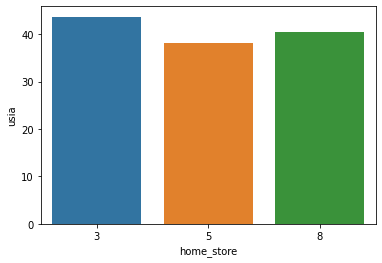

In [136]:
# melihat proporsi rata-rata usia customer menggunakan bar plot
sns.barplot(x="home_store", y="usia", data=cust_group_usia)

In [137]:
# setelah itu kita ubah kembali tipe data birth_year menjadi tipe data object / string, untuk kebutuhan EDA selanjutnya
cust['birth_year'] = cust['birth_year'].astype(str)

In [138]:
# memastikan kembali perubahan tipe data
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_id          2246 non-null   object
 1   home_store           2246 non-null   object
 2   customer_first-name  2246 non-null   object
 3   gender               2246 non-null   object
 4   birth_year           2246 non-null   object
 5   usia                 2246 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 105.4+ KB


> Berdasarkan hasil temuan di atas dapat diketahui bahwa:
> 
> - rata-rata usia customer secara keseluruhan yakni berusia 40.61442564559216  tahun
>
> - sedangkan rata-rata usia customer berdasarkan home store yang dikunjungi didapatkan variasi rata-rata yakni 43.651250 tahun (home store 3), 38.176720 tahun (home store 5), & 40.363273 tahun (home store 8)

2. Berapakah proporsi generasi dari customer?

In [139]:
cust.head(2)

,customer_id,home_store,customer_first-name,gender,birth_year,usia
0,1,3,Kelly Key,M,1950,69
1,2,3,Clark Schroeder,M,1950,69


In [140]:
gen.head(2)

,birth_year,generation
0,1946,Baby Boomers
1,1947,Baby Boomers


In [141]:
# membuat variabel yang berisikan merger antara data customer & generasi; dimerger secara left join
cust_merge = pd.merge(cust, gen, left_on='birth_year', right_on='birth_year', how='left')

In [142]:
# mengecek hasil merger
cust_merge

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation
0,1,3,Kelly Key,M,1950,69,Baby Boomers
1,2,3,Clark Schroeder,M,1950,69,Baby Boomers
2,3,3,Elvis Cardenas,M,1950,69,Baby Boomers
3,4,3,Rafael Estes,M,1950,69,Baby Boomers
4,5,3,Colin Lynn,M,1951,68,Baby Boomers
...,...,...,...,...,...,...,...
2241,8497,8,Rae,F,1977,42,Gen X
2242,8498,8,April,N,2000,19,Gen Z
2243,8499,8,Clementine,F,1996,23,Gen Z
2244,8500,8,Linda,N,1990,29,Younger Millennials


In [143]:
# membuat variabel yang berisikan jumlah customer berdasarkan generasi
cust_merge_gen = cust_merge.groupby(['generation'])['customer_id'].count()

In [144]:
# mengecek banyaknya customer berdasarkan generasi
cust_merge_gen

generation
Baby Boomers           529
Gen X                  522
Gen Z                  382
Older Millennials      515
Younger Millennials    298
Name: customer_id, dtype: int64

In [145]:
# membuat variabel yang berisikan persentase rasio jumlah customer berdasarkan generasi
prop_cust_gen = (cust_merge_gen/cust_merge_gen.sum() * 100).reset_index()

In [146]:
# melihat persentase rasio
prop_cust_gen

,generation,customer_id
0,Baby Boomers,23.552983
1,Gen X,23.241318
2,Gen Z,17.008014
3,Older Millennials,22.929653
4,Younger Millennials,13.268032


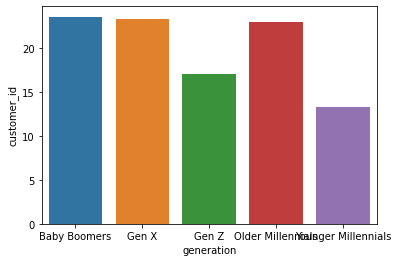

In [147]:
# membuat bar plot untuk melihat proporsi persentase rasio
sns.barplot(data=prop_cust_gen, x='generation', y='customer_id')

> Berdasarkan hasil temuan di atas dapat diketahui bahwa:
>
> - yang menjadi top 3 generasi terbanyak yakni Baby Boomers, Gen X, & Older Millenials
> - Baby Boomers merupakan generasi terbanyak dari customer di coffee shop

3. Berapakah proporsi gender dari customer?

In [148]:
# membuat variabel yang berisikan jumlah customer berdasarkan gender
cust_gender = cust.groupby(['gender'])['customer_id'].count()

In [149]:
# mengecek banyaknya customer berdasarkan gender
cust_gender

gender
F    977
M    726
N    543
Name: customer_id, dtype: int64

In [150]:
# membuat variabel yang berisikan persentase rasio jumlah customer berdasarkan gender
cust_gender2 = (cust_gender/cust_gender.sum() * 100).reset_index()

In [151]:
# melihat persentase rasio 
cust_gender2

,gender,customer_id
0,F,43.499555
1,M,32.324132
2,N,24.176313


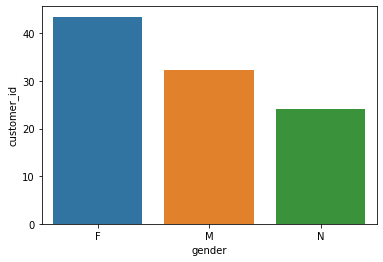

In [152]:
# membuat bar plot untuk melihat proporsi persentase rasio 
sns.barplot(data=cust_gender2, x='gender', y='customer_id')

> Berdasarkan hasil temuan di atas dapat diketahui bahwa:
> - Gender / jenis kelamin terbanyak dari customer yakni female / wanita

4. Dari segmentasi generasi & gender, customer mana yang paling gemar melakukan purchasing di coffee shop?

In [153]:
cust_merge.head(3)

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation
0,1,3,Kelly Key,M,1950,69,Baby Boomers
1,2,3,Clark Schroeder,M,1950,69,Baby Boomers
2,3,3,Elvis Cardenas,M,1950,69,Baby Boomers


In [154]:
receipt.head(3)

,transaction_id,transaction_date,sales_outlet_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,7,2019-04-01,3,558,0,52,1,2.5,0
1,11,2019-04-01,3,781,0,27,2,3.5,0
2,19,2019-04-01,3,788,1,46,2,2.5,0


In [155]:
# membuat variabel yang berisikan merger antara data customer_merge & receipt; dimerger secara left join
cust_merge2 = pd.merge(cust_merge, receipt, left_on='customer_id', right_on='customer_id', how='left')

In [156]:
# melihat hasil merger
cust_merge2

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation,transaction_id,transaction_date,sales_outlet_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,1,3,Kelly Key,M,1950,69,Baby Boomers,1783,2019-04-02,3,1,32,1.0,3.00,0
1,1,3,Kelly Key,M,1950,69,Baby Boomers,235,2019-04-03,3,0,37,1.0,3.00,0
2,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-15,3,0,28,2.0,2.00,0
3,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-19,3,0,28,2.0,2.00,0
4,1,3,Kelly Key,M,1950,69,Baby Boomers,2112,2019-04-26,3,0,58,1.0,3.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,8501,8,Moana,F,1966,53,Gen X,632,2019-04-02,8,0,61,1.0,4.75,0
24849,8501,8,Moana,F,1966,53,Gen X,543,2019-04-04,8,1,51,1.0,3.00,0
24850,8501,8,Moana,F,1966,53,Gen X,2437,2019-04-04,8,1,45,2.0,3.00,0
24851,8501,8,Moana,F,1966,53,Gen X,53,2019-04-27,8,0,43,2.0,3.00,0


In [157]:
# membuat variabel yang berisikan jumlah customer berdasarkan generation & gender
cust_buy = pd.DataFrame(cust_merge2.groupby(by = ['generation', 'gender'], dropna=False)['customer_id'].count())

In [158]:
# mengecek jumlah customer berdasarkan generation & gender
cust_buy

customer_id
generation          gender             
Baby Boomers        F              3047
                    M              2656
                    N               316
Gen X               F              3133
                    M              2241
                    N               318
Gen Z               F              1452
                    M               913
                    N              1924
Older Millennials   F              2126
                    M              1635
                    N              1713
Younger Millennials F              1094
                    M               777
                    N              1508

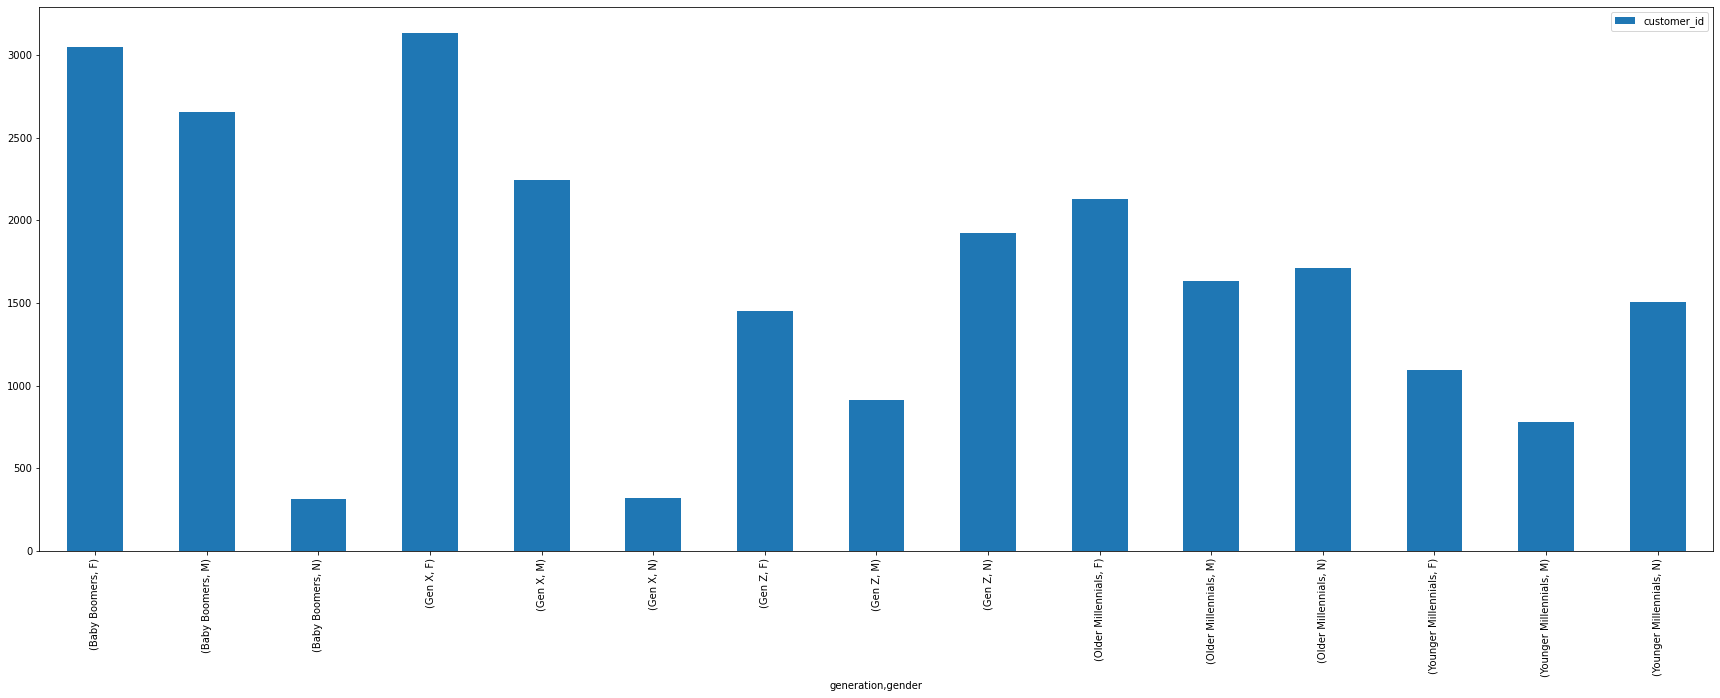

In [159]:
# membuat bar plot untuk melihat frekuensi jumlah customer berdasarkan generation & gender
cust_buy.plot(kind = 'bar',figsize = (30,10))

> Berdasarkan hasil temuan di atas dapat diketahui bahwa:
> - Jenis customer yang gemar melakukan purchasing di coffee shop, berdasarkan segmentasi generasi & gender, yakni customer dengan generasi Gen X dan berjenis kelamin wanita.

5. Berdasarkan segmentasi generasi & gender, customer mana yang paling gemar membeli kopi?

In [160]:
cust_merge2

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation,transaction_id,transaction_date,sales_outlet_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,1,3,Kelly Key,M,1950,69,Baby Boomers,1783,2019-04-02,3,1,32,1.0,3.00,0
1,1,3,Kelly Key,M,1950,69,Baby Boomers,235,2019-04-03,3,0,37,1.0,3.00,0
2,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-15,3,0,28,2.0,2.00,0
3,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-19,3,0,28,2.0,2.00,0
4,1,3,Kelly Key,M,1950,69,Baby Boomers,2112,2019-04-26,3,0,58,1.0,3.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,8501,8,Moana,F,1966,53,Gen X,632,2019-04-02,8,0,61,1.0,4.75,0
24849,8501,8,Moana,F,1966,53,Gen X,543,2019-04-04,8,1,51,1.0,3.00,0
24850,8501,8,Moana,F,1966,53,Gen X,2437,2019-04-04,8,1,45,2.0,3.00,0
24851,8501,8,Moana,F,1966,53,Gen X,53,2019-04-27,8,0,43,2.0,3.00,0


In [161]:
product

,product_id,product_group,product_category,product_type,product,current_wholesale_price,current_retail_price,tax_exempt_yn,promo_yn,new_product_yn,current_retail_price_value
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,14.40,$18.00,1,0,0,18.00
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,14.40,$18.00,1,0,0,18.00
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,11.80,$14.75,1,0,0,14.75
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,16.36,$20.45,1,0,0,20.45
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,12.00,$15.00,1,0,0,15.00
...,...,...,...,...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,0.04,$0.80,1,0,0,0.80
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,1.20,$6.00,1,0,1,6.00
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,0.60,$3.00,1,0,0,3.00
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,0.42,$2.10,1,1,0,2.10


In [162]:
# membuat variabel data yang berisikan data produk dengan beberapa kolom pilihan
product2 = pd.DataFrame(product[['product_id','product_group', 'product_category', 'product_type', 'product', 'tax_exempt_yn', 'new_product_yn']])

In [163]:
# mengecek data product2
product2

,product_id,product_group,product_category,product_type,product,tax_exempt_yn,new_product_yn
0,1,Whole Bean/Teas,Coffee beans,Organic Beans,Brazilian - Organic,1,0
1,2,Whole Bean/Teas,Coffee beans,House blend Beans,Our Old Time Diner Blend,1,0
2,3,Whole Bean/Teas,Coffee beans,Espresso Beans,Espresso Roast,1,0
3,4,Whole Bean/Teas,Coffee beans,Espresso Beans,Primo Espresso Roast,1,0
4,5,Whole Bean/Teas,Coffee beans,Gourmet Beans,Columbian Medium Roast,1,0
...,...,...,...,...,...,...,...
83,84,Add-ons,Flavours,Regular syrup,Chocolate syrup,1,0
84,85,Beverages,Coffee,Specialty coffee,Rio Nights,1,1
85,87,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot,1,0
86,88,Beverages,Coffee,Barista Espresso,Ouro Brasileiro shot promo,1,0


In [164]:
# membuat variabel data yang berisikan merger antara data pada cust_merge2 & product2, secara left join
cust_merge3 = pd.merge(cust_merge2, product2, left_on='product_id', right_on='product_id', how='left')

In [165]:
# mengecek data
cust_merge3

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation,transaction_id,transaction_date,sales_outlet_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,product_group,product_category,product_type,product,tax_exempt_yn,new_product_yn
0,1,3,Kelly Key,M,1950,69,Baby Boomers,1783,2019-04-02,3,1,32,1.0,3.00,0,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Rg,1.0,0.0
1,1,3,Kelly Key,M,1950,69,Baby Boomers,235,2019-04-03,3,0,37,1.0,3.00,0,Beverages,Coffee,Barista Espresso,Espresso shot,1.0,0.0
2,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-15,3,0,28,2.0,2.00,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
3,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-19,3,0,28,2.0,2.00,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
4,1,3,Kelly Key,M,1950,69,Baby Boomers,2112,2019-04-26,3,0,58,1.0,3.50,0,Beverages,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,8501,8,Moana,F,1966,53,Gen X,632,2019-04-02,8,0,61,1.0,4.75,0,Beverages,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,1.0,0.0
24849,8501,8,Moana,F,1966,53,Gen X,543,2019-04-04,8,1,51,1.0,3.00,0,Beverages,Tea,Brewed Black tea,Earl Grey Lg,1.0,0.0
24850,8501,8,Moana,F,1966,53,Gen X,2437,2019-04-04,8,1,45,2.0,3.00,0,Beverages,Tea,Brewed herbal tea,Peppermint Lg,1.0,0.0
24851,8501,8,Moana,F,1966,53,Gen X,53,2019-04-27,8,0,43,2.0,3.00,0,Beverages,Tea,Brewed herbal tea,Lemon Grass Lg,1.0,0.0


In [166]:
# membuat variabel yang berisikan jumlah customer terbanyak berdasarkan kategori produk
cust_purchase = pd.DataFrame(cust_merge3.groupby(by = ['generation', 'gender', 'product_category'], dropna=False)['customer_id'].count())

In [167]:
# mengecek variabel
cust_purchase

customer_id
generation          gender product_category               
Baby Boomers        F      Bakery                      469
                           Branded                       7
                           Coffee                     1229
                           Coffee beans                 27
                           Drinking Chocolate          231
...                                                    ...
Younger Millennials N      Drinking Chocolate          104
                           Flavours                     52
                           Loose Tea                     9
                           Packaged Chocolate            4
                           Tea                         507

[134 rows x 1 columns]

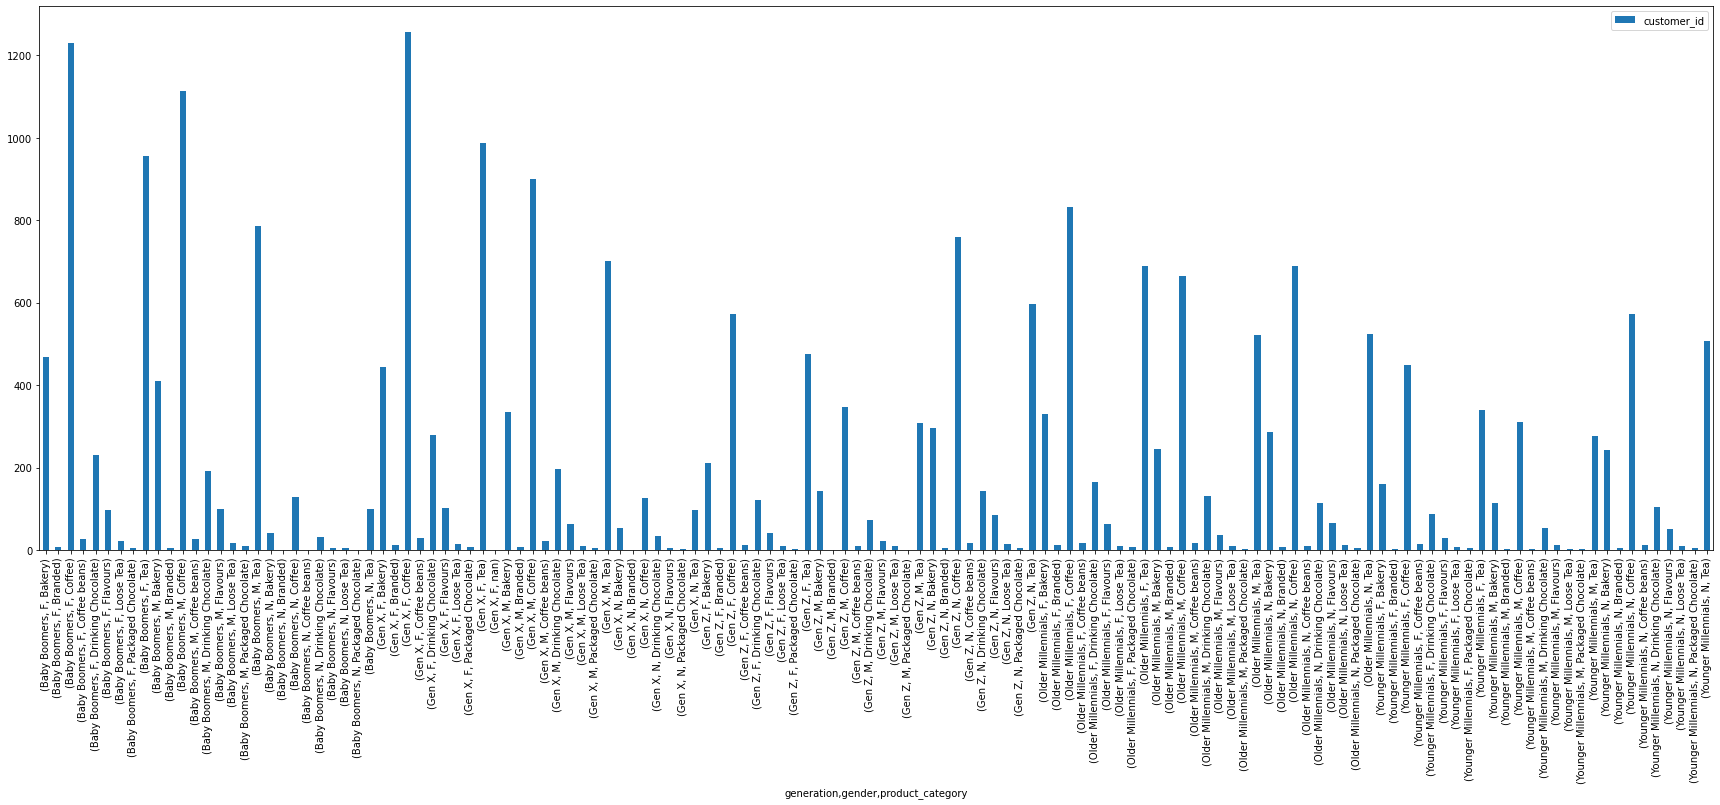

In [168]:
# membuat barplot untuk melihat jumlah customer berdasarkan generasi, gender, & kategori produk
cust_purchase.plot(kind = 'bar',figsize = (30,10))

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Customer yang paling gemar membeli kopi yakni customer dengan generasi Gen X & berjenis kelamin wanita

6. Apakah berdasarkan segmentasi generasi & gender, customer dengan generasi Younger Millenials dan berjenis kelamin wanita merupakan yang paling suka menggunakan promo?

In [169]:
cust_merge3.head(5)

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation,transaction_id,transaction_date,sales_outlet_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,product_group,product_category,product_type,product,tax_exempt_yn,new_product_yn
0,1,3,Kelly Key,M,1950,69,Baby Boomers,1783,2019-04-02,3,1,32,1.0,3.0,0,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Rg,1.0,0.0
1,1,3,Kelly Key,M,1950,69,Baby Boomers,235,2019-04-03,3,0,37,1.0,3.0,0,Beverages,Coffee,Barista Espresso,Espresso shot,1.0,0.0
2,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-15,3,0,28,2.0,2.0,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
3,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-19,3,0,28,2.0,2.0,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
4,1,3,Kelly Key,M,1950,69,Baby Boomers,2112,2019-04-26,3,0,58,1.0,3.5,0,Beverages,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,1.0,0.0


In [170]:
# membuat variabel yang berisikan jumlah customer berdasarkan generasi, & gender, & pengguna promo
cust_promo = pd.DataFrame(cust_merge3.groupby(by= ["generation", "gender", "promo_item_yn"], dropna=True)['customer_id'].count())

In [171]:
# mengecek variabel
cust_promo

customer_id
generation          gender promo_item_yn             
Baby Boomers        F      0                     3041
                           1                        6
                    M      0                     2620
                           1                       36
                    N      0                      316
Gen X               F      0                     3110
                           1                       22
                    M      0                     2231
                           1                       10
                    N      0                      318
Gen Z               F      0                     1442
                           1                       10
                    M      0                      905
                           1                        8
                    N      0                     1905
                           1                       19
Older Millennials   F      0                     2108
                           1                       18
                    M      0                     1622
                           1                       13
                    N      0                     1701
                           1                       12
Younger Millennials F      0                     1083
                           1                       11
                    M      0                      765
                           1                       12
                    N      0                     1496
                           1                       12

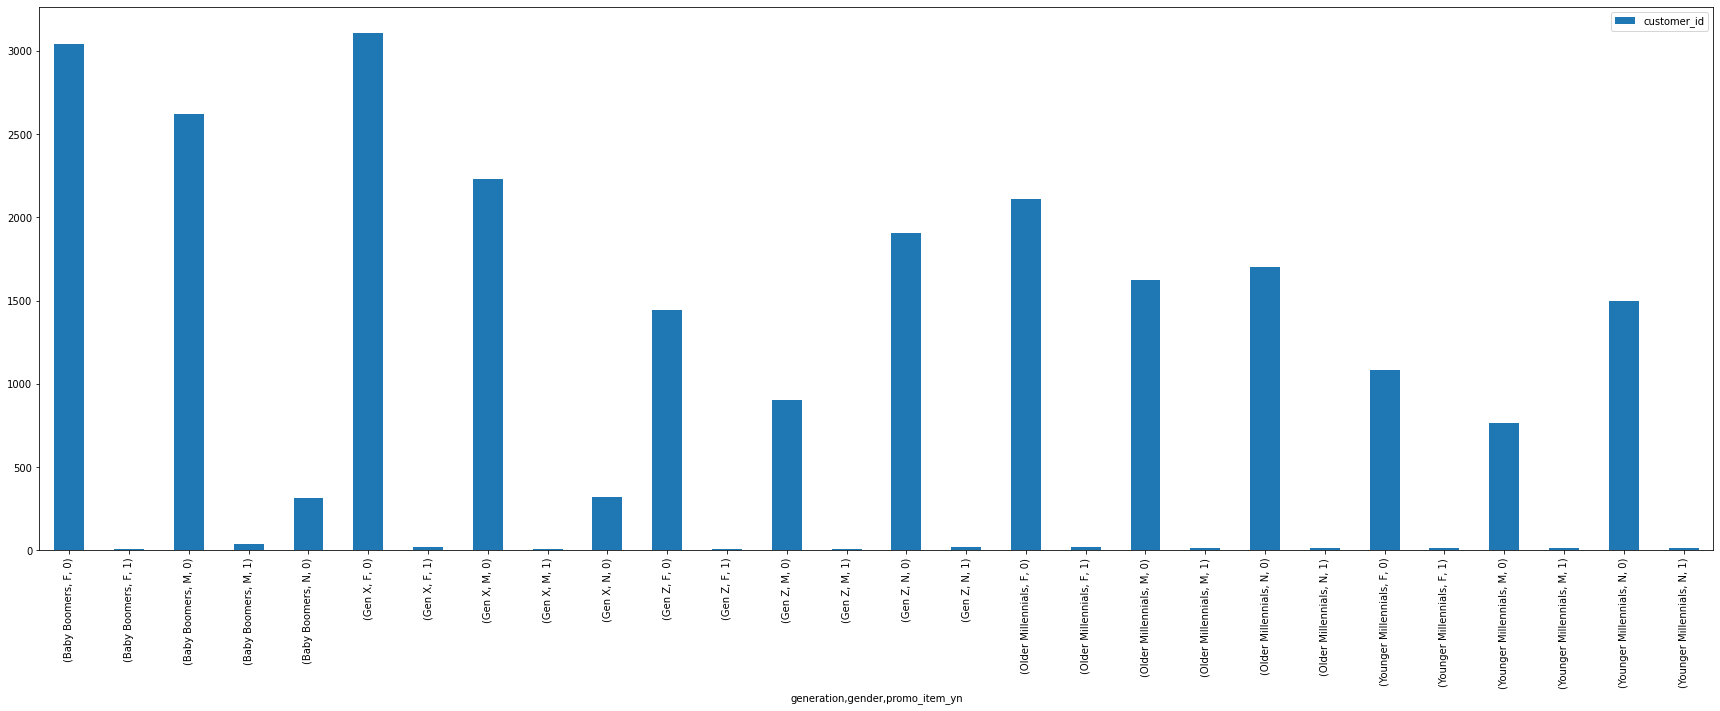

In [172]:
# membuat barplot untuk mengetahui frekuensi jumlah customer berdasarkan generasi, gender, & pengguna promo item
cust_promo.plot(kind = 'bar',figsize = (30,10))

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Customer dengan generasi Younger Millenials & berjenis kelamin wanita bukan merupakan jenis customer yang paling suka menggunakan promo. Melainkan customer yang paling suka menggunakan promo yakni customer dengan generasi Baby Boomers & berjenis kelamin pria dengan pengguna promo sebanyak 36 customer
> - Selain itu, dijumpai pula bahwa lebih banyak customer yang tidak menggunakan promo item dibandingkan yang menggunakan promo item
> - Dan customer yang paling banyak tidak menggunakan promo item yakni customer dengan generasi Gen X & berjenis kelamin wanita

7. Bagaimanakah distribusi customer yang membeli langsung di tempat (in store) dari segmentasi generasi & gender?

In [173]:
# membuat variabel yang berisikan jumlah customer berdasarkan pembeli langsung (in store)
cust_instore_yn = pd.DataFrame(cust_merge3.groupby(['instore_yn'], dropna=True)['customer_id'].count())

In [174]:
# membuat variabel yang berisikan rasio persentase pembeli langsung & tidak
cust_instore_rasio = (cust_instore_yn/cust_instore_yn.sum() * 100).reset_index()

In [175]:
# mengecek variabel
cust_instore_rasio

,instore_yn,customer_id
0,,0.173024
1,0,49.750523
2,1,50.076453


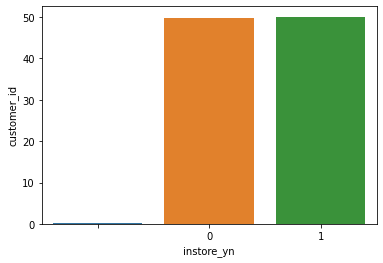

In [176]:
# membuat barplot yang berisikan rasio pembeli langsung (in store) & tidak
sns.barplot(data=cust_instore_rasio, x='instore_yn', y='customer_id')

In [177]:
# membuat variabel yang berisikan jumlah pembeli langsung & tidak, berdasarkan generasi & gender
cust_instore = pd.DataFrame(cust_merge3.groupby(by= ["generation", "gender", "instore_yn"], dropna=True)['customer_id'].count())

In [178]:
# mengecek variabel
cust_instore

customer_id
generation          gender instore_yn             
Baby Boomers        F                            7
                           0                  1487
                           1                  1553
                    M                            8
                           0                  1366
                           1                  1282
                    N      0                   149
                           1                   167
Gen X               F                           12
                           0                  1603
                           1                  1517
                    M      0                  1150
                           1                  1091
                    N      0                   178
                           1                   140
Gen Z               F                            2
                           0                   678
                           1                   772
                    M                            2
                           0                   442
                           1                   469
                    N                            3
                           0                   936
                           1                   985
Older Millennials   F                            2
                           0                  1053
                           1                  1071
                    M                            3
                           0                   804
                           1                   828
                    N      0                   893
                           1                   820
Younger Millennials F                            2
                           0                   502
                           1                   590
                    M      0                   365
                           1                   412
                    N                            2
                           0                   758
                           1                   748

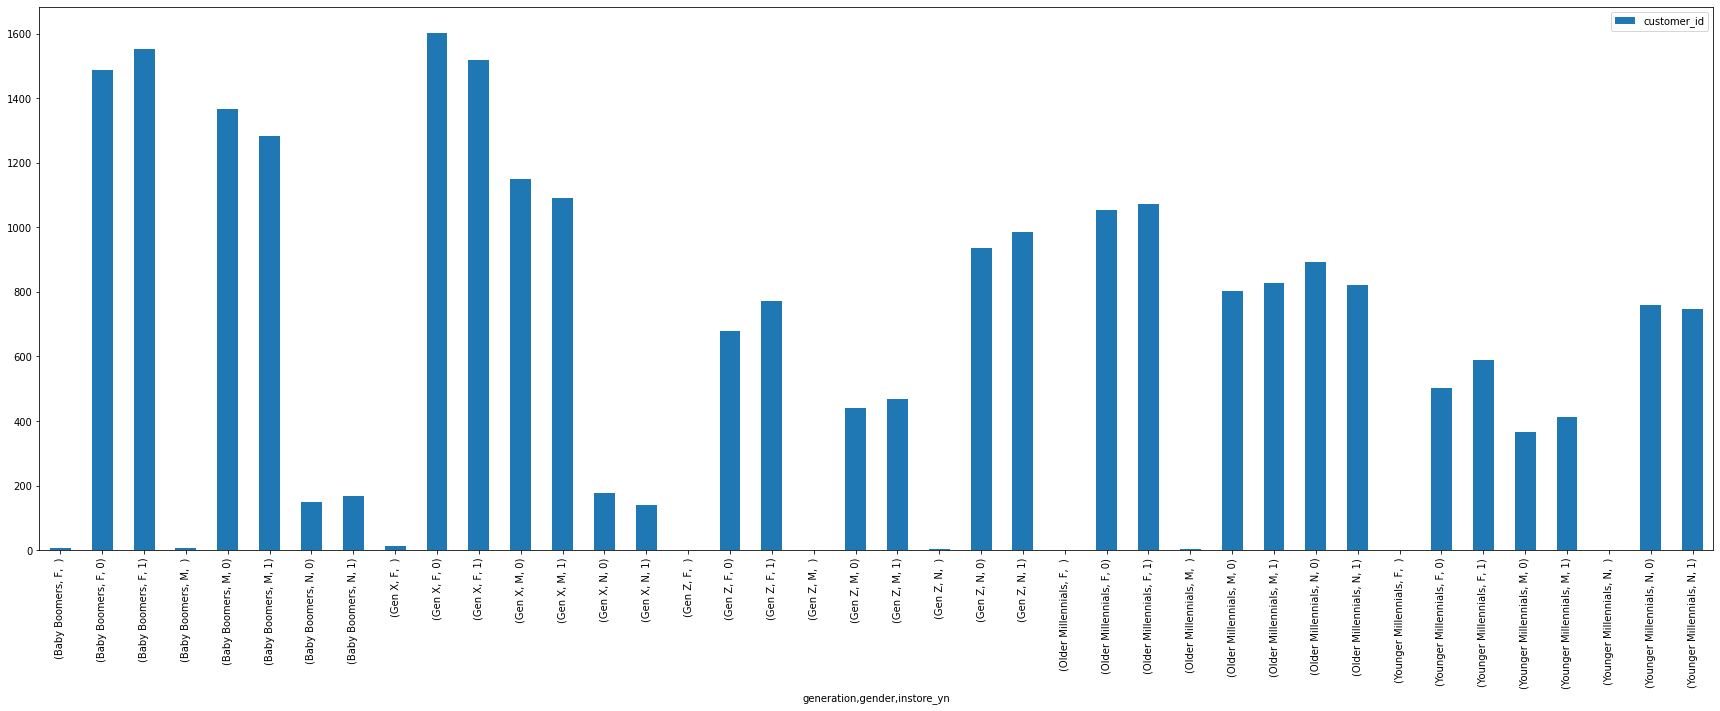

In [179]:
# membuat barplot yang berisikan frekuensi jumlah customer yang merupakan pembeli langsung & tidak
cust_instore.plot(kind = 'bar',figsize = (30,10))

> Berdasarkan temuan di atas, dapat diketahui bahwa:
> - Perbandingan rasio antara customer yang membeli langsung (in store) dengan yang tidak membeli langsung terlampau sedikit.
> - Adapun ditemukan bahwa customer terbanyak yang membeli langsung (in store),yakni customer dengan generasi Baby Boomers & berjenis kelamin wanita. Sedangkan customer terbanyak yang membeli tidak langsung (not in store), yakni customer dengan generasi Gen X & berjenis kelamin wanita.

8. Customer manakah yang paling gemar membeli new product berdasarkan segmentasi generasi & gender?

In [180]:
cust_merge3

,customer_id,home_store,customer_first-name,gender,birth_year,usia,generation,transaction_id,transaction_date,sales_outlet_id,instore_yn,product_id,quantity,unit_price,promo_item_yn,product_group,product_category,product_type,product,tax_exempt_yn,new_product_yn
0,1,3,Kelly Key,M,1950,69,Baby Boomers,1783,2019-04-02,3,1,32,1.0,3.00,0,Beverages,Coffee,Gourmet brewed coffee,Ethiopia Rg,1.0,0.0
1,1,3,Kelly Key,M,1950,69,Baby Boomers,235,2019-04-03,3,0,37,1.0,3.00,0,Beverages,Coffee,Barista Espresso,Espresso shot,1.0,0.0
2,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-15,3,0,28,2.0,2.00,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
3,1,3,Kelly Key,M,1950,69,Baby Boomers,662,2019-04-19,3,0,28,2.0,2.00,0,Beverages,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1.0,0.0
4,1,3,Kelly Key,M,1950,69,Baby Boomers,2112,2019-04-26,3,0,58,1.0,3.50,0,Beverages,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24848,8501,8,Moana,F,1966,53,Gen X,632,2019-04-02,8,0,61,1.0,4.75,0,Beverages,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,1.0,0.0
24849,8501,8,Moana,F,1966,53,Gen X,543,2019-04-04,8,1,51,1.0,3.00,0,Beverages,Tea,Brewed Black tea,Earl Grey Lg,1.0,0.0
24850,8501,8,Moana,F,1966,53,Gen X,2437,2019-04-04,8,1,45,2.0,3.00,0,Beverages,Tea,Brewed herbal tea,Peppermint Lg,1.0,0.0
24851,8501,8,Moana,F,1966,53,Gen X,53,2019-04-27,8,0,43,2.0,3.00,0,Beverages,Tea,Brewed herbal tea,Lemon Grass Lg,1.0,0.0


In [181]:
# membuat variabel yang berisikan jumlah customer berdasarkan pembeli new product
cust_prod_yn = pd.DataFrame(cust_merge3.groupby(['new_product_yn'], dropna=True)['customer_id'].count())

In [182]:
# membuat variabel yang berisikan rasio jumlah customer berdasarkan pembeli new product
cust_prod_yn_rasio = (cust_prod_yn/cust_prod_yn.sum() * 100).reset_index()

In [183]:
# mengecek variabel
cust_prod_yn_rasio

,new_product_yn,customer_id
0,0.0,100.0


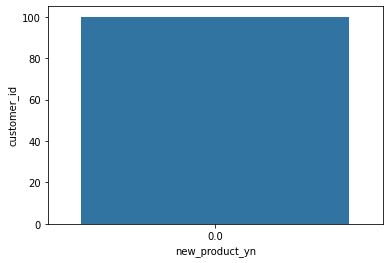

In [184]:
# membuat barplot untuk melihat frekuensi jumlah customer berdasarkan pembeli new product
sns.barplot(data=cust_prod_yn_rasio, x='new_product_yn', y='customer_id')

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Dari keseluruhan customer berdasarkan segmentasi generasi & gender tidak ada satu pun customer yang membeli new product. Sehingga tidak (bisa) didapati customer yang gemar membeli new product.

####**B. TRANSAKSI PENJUALAN**

1. Pada tanggal berapakah transaksi paling banyak dilakukan?

In [185]:
total_trx.head(5)

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,0,0,0,F,1983
1,781,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,0,0,0,N,1991
2,788,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,1,0,0,N,1995
3,683,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,0,0,0,F,1999
4,99,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,1,0,0,M,1967


In [186]:
# membuat variabel yang berisikan jumlah customer berdasarkan tanggal transaksi
trx_harian = pd.DataFrame(total_trx.groupby('transaction_date')['customer_id'].count())

In [187]:
# mengecek variabel
trx_harian

,customer_id
transaction_date,
2019-04-01,1657
2019-04-02,1638
2019-04-03,1681
2019-04-04,1590
2019-04-05,1634
2019-04-06,1464
2019-04-07,854
2019-04-08,889
2019-04-09,666


In [188]:
# mereset variabel 
trx_harian = trx_harian.reset_index()

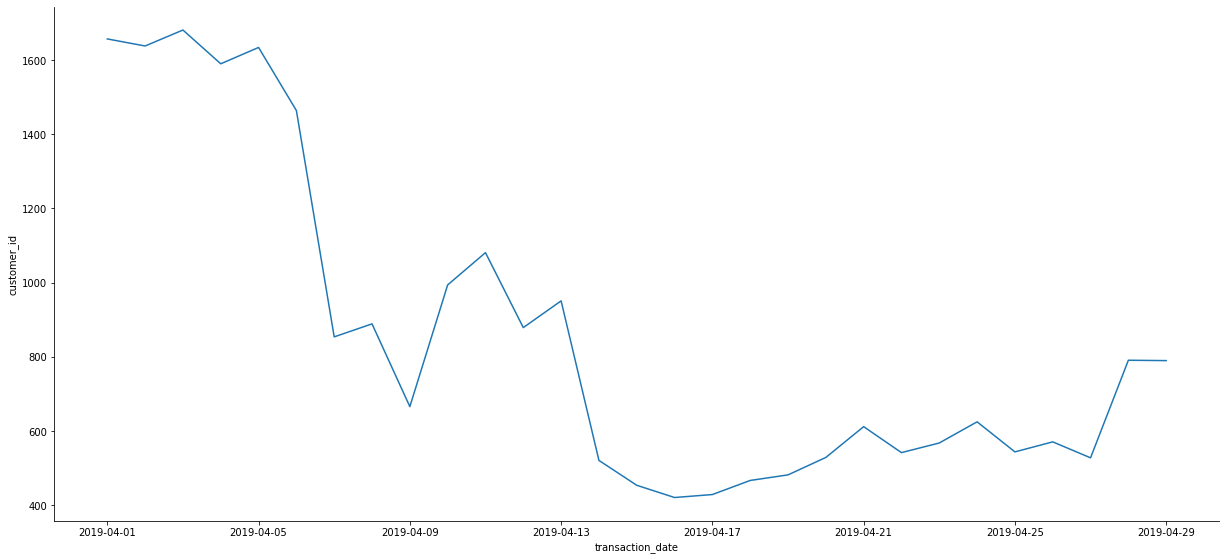

In [189]:
# membuat line plot yang menginterpretasikan frekuensi jumlah customer berdasarkan tanggal transaksi
graf = sns.relplot(x="transaction_date", y="customer_id", kind="line", data=trx_harian)
graf.fig.set_size_inches(20,8)

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Transaksi terbanyak terjadi pada tanggal 3 April 2019
> - Terjadi penurunan angka transaksi di coffee shop selama bulan April tahun 2019

2. Pada tanggal berapa transaksi pembelian oleh customer yang menggunakan promo paling banyak dilakukan?

In [190]:
# membuat variabel yang berisikan 
trx_promo = pd.crosstab(total_trx['transaction_date'],total_trx['promo_item_yn'],total_trx['customer_id'],aggfunc='count', dropna=True)

In [191]:
# mengecek variabel
trx_promo

promo_item_yn,0,1
transaction_date,,
2019-04-01,1657.0,NaN
2019-04-02,1638.0,NaN
2019-04-03,1681.0,NaN
2019-04-04,1590.0,NaN
2019-04-05,1634.0,NaN
2019-04-06,1464.0,NaN
2019-04-07,854.0,NaN
2019-04-08,889.0,NaN
2019-04-09,666.0,NaN


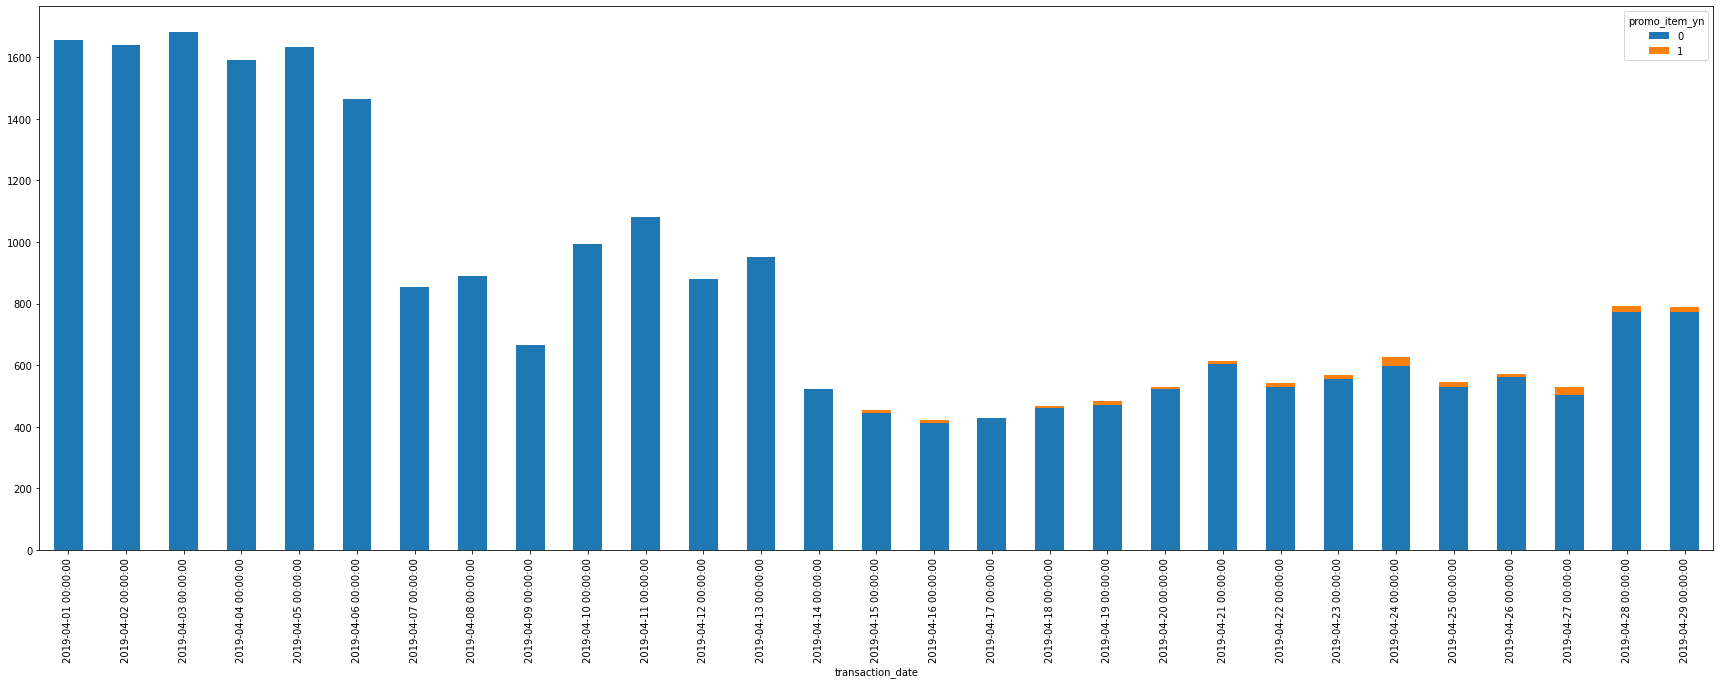

In [192]:
# membuat barplot untuk melihat frekuensi jumlah transaksi dengan menggunakan promo item
trx_promo.plot(kind = 'bar',figsize = (30,10), stacked = True)

> Berdasarkan temuan di atas, dapat diketahui bahwa:
> - Transaksi oleh customer yang membeli promo item paling banyak, terjadi pada tanggal 24 April 2019 sebesar 28 customer.
> - Dari keseluruhan transaksi, banyak dilakukan pembelian tanpa membeli promo item.

3. Di outlet manakah (city & address) transaksi pembelian terbanyak dilakukan?

In [193]:
total_trx.head(3)

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.5,0,0,0,F,1983
1,781,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.5,0,0,0,N,1991
2,788,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.5,1,0,0,N,1995


In [194]:
# mengecek info data
total_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24852 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       24852 non-null  object        
 1   transaction_date  24852 non-null  datetime64[ns]
 2   store_address     24852 non-null  object        
 3   store_city        24852 non-null  object        
 4   product_group     24852 non-null  object        
 5   product_category  24852 non-null  object        
 6   product_type      24852 non-null  object        
 7   product           24852 non-null  object        
 8   quantity          24852 non-null  int64         
 9   unit_price        24852 non-null  float64       
 10  instore_yn        24852 non-null  object        
 11  promo_item_yn     24852 non-null  int64         
 12  new_product_yn    24852 non-null  int64         
 13  gender            24852 non-null  object        
 14  birth_year        2485

In [195]:
# mengubah tipe data 'YN' menjadi tipe data object / string
total_trx[['instore_yn', 'promo_item_yn', 'new_product_yn']] = total_trx[['instore_yn', 'promo_item_yn', 'new_product_yn']].astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [196]:
# mengecek perubahan tipe data
total_trx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24852 entries, 0 to 49893
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       24852 non-null  object        
 1   transaction_date  24852 non-null  datetime64[ns]
 2   store_address     24852 non-null  object        
 3   store_city        24852 non-null  object        
 4   product_group     24852 non-null  object        
 5   product_category  24852 non-null  object        
 6   product_type      24852 non-null  object        
 7   product           24852 non-null  object        
 8   quantity          24852 non-null  int64         
 9   unit_price        24852 non-null  float64       
 10  instore_yn        24852 non-null  object        
 11  promo_item_yn     24852 non-null  object        
 12  new_product_yn    24852 non-null  object        
 13  gender            24852 non-null  object        
 14  birth_year        2485

In [197]:
# membuat variabel yang berisikan jumlah customer berdasarkan store city
trx_outlet_city = pd.DataFrame(total_trx.groupby(["store_city"])['customer_id'].count())

In [198]:
# mengecek variabel
trx_outlet_city

,customer_id
store_city,
Long Island City,8593
New York,16259


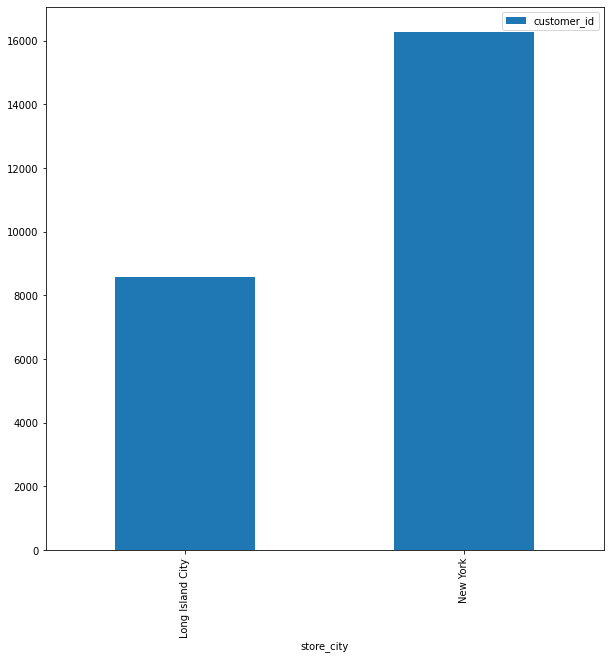

In [199]:
# membuat barplot yang menginterpretasikan jumlah customer berdasarkan store city
trx_outlet_city.plot(kind = 'bar',figsize = (10,10))

In [200]:
# membuat variabel yang berisikan jumlah customer berdasarkan store city & berfokus pada city address
trx_outlet = pd.DataFrame(total_trx.groupby(by= ["store_city", "store_address"], dropna=True)['customer_id'].count())

In [201]:
# mengecek variabel
trx_outlet

customer_id
store_city       store_address                 
Long Island City 32-20 Broadway            8593
New York         100 Church Street         8545
                 687 9th Avenue            7714

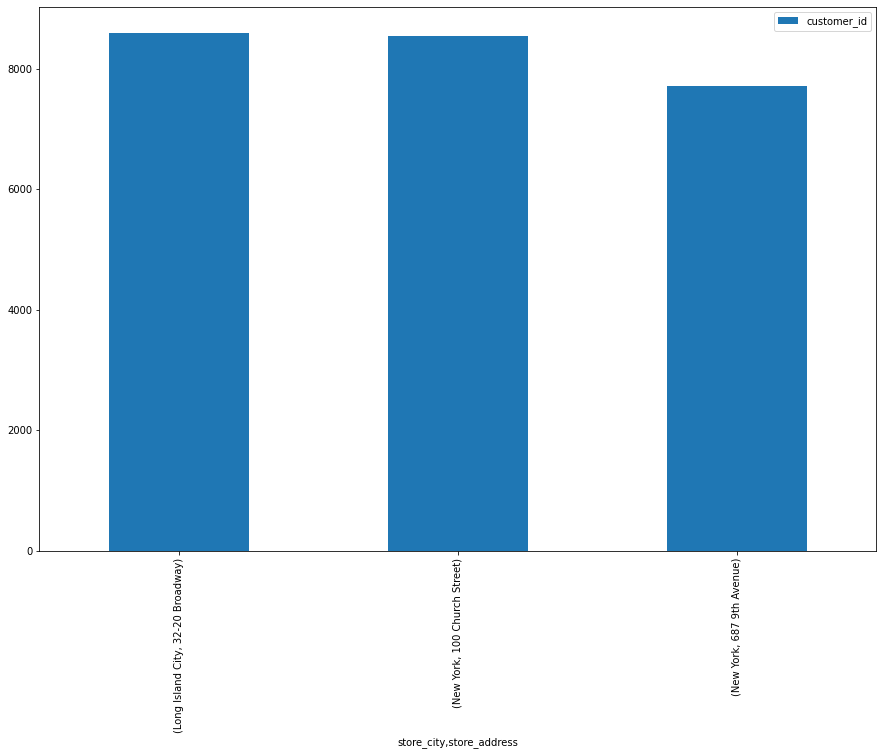

In [202]:
# membuat barplot yang menginterpretasikan jumlah customer berdasarkan store city & berfokus pada city address
trx_outlet.plot(kind = 'bar',figsize = (15,10))

> Berdasarkan temuan di atas, dapat diketahui bahwa: 
> - Transaksi pembelian oleh customer paling banyak dilakukan di kota New York
> - Sedangkan berdasarkan alamat outlet, transaksi pembelian oleh customer paling banyak dilakukan di outlet yang beralamatkan 32-20 broadway, Long Island city

4. Berapa banyak terjadinya transaksi dilakukan di tempat (in store) oleh customer?

In [203]:
# membuat variabel yang berisikan jumlah customer berdasarkan pembeli di tempat (in store)
trx_instore = pd.DataFrame(total_trx.groupby(by= ['instore_yn'], dropna=True)['customer_id'].count())

In [204]:
# mengecek variabel
trx_instore

,customer_id
instore_yn,
,43
0,12364
1,12445


In [205]:
# mereset index
trx_instore = trx_instore.reset_index()

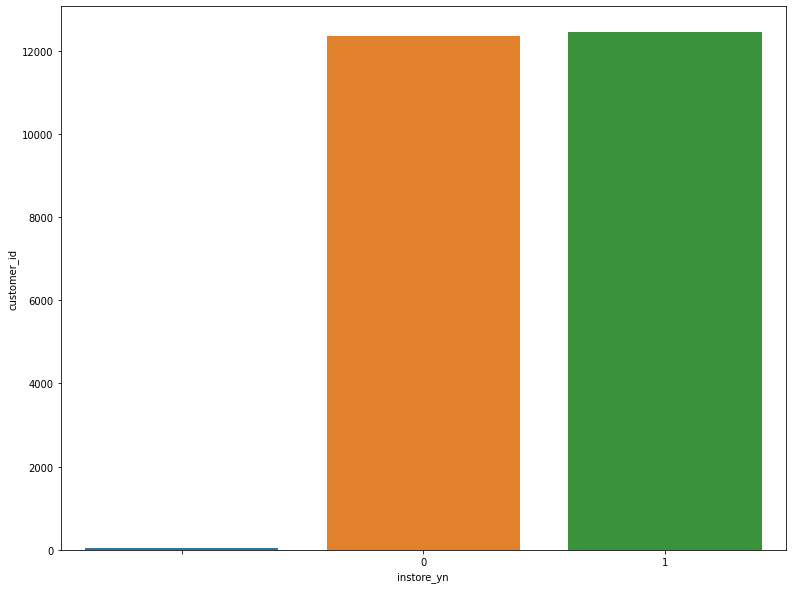

In [206]:
# membuat barplot yang berisikan frekuensi jumlah customer berdasarkan pembeli langsung (in store) & tidak
plt.figure(figsize=(13, 10))
g = sns.barplot(data=trx_instore, x='instore_yn', y='customer_id')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Transaksi yang dilakukan di tempat (in store) oleh customer sejumlah 12445 customer
> - Selisih antara jumlah customer yang membeli langsung (in store) dengan customer yang membeli tidak langsung / di tempat terpaut sedikit
> - Terdapat anomali data, dimana terdapat beberapa data terhitung sebagai bukan bernilai 'Y / 1' ataupun bernilai 'N / 0', & juga bukan terhitung sebagai NaN

####**C. PRODUCT RECOMMENDATION**

1. Grup, kategori, & tipe produk mana saja kah yang menjadi top purchase oleh customer?

In [207]:
total_trx.head(5)

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.50,0,0,0,F,1983
1,781,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.50,0,0,0,N,1991
2,788,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.50,1,0,0,N,1995
3,683,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2,2.50,0,0,0,F,1999
4,99,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,1,2.45,1,0,0,M,1967


In [208]:
# membuat variabel yang berisikan jumlah pembelian customer berdasarkan grup produk
prod_group = pd.DataFrame(total_trx.groupby(['product_group'])['customer_id'].count())

In [209]:
# mengecek variabel
prod_group

,customer_id
product_group,
Add-ons,782
Beverages,19769
Food,3780
Merchandise,82
Whole Bean/Teas,439


In [210]:
# mereset index variabel
prod_group = prod_group.reset_index()

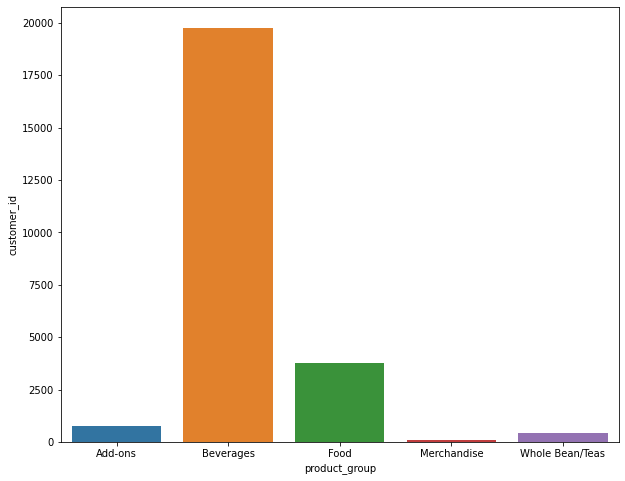

In [211]:
# membuat barplot yang menginterpretasikan frekuensi jumlah pembelian berdasarkan grup produk
plt.figure(figsize=(10,8))
graf2 = sns.barplot(data=prod_group, x='product_group', y='customer_id')
plt.show()

In [212]:
# membuat variabel yang beriisikan jumlah pembelian berdasarkan kategori produk yang dibeli
prod_cat = pd.DataFrame(total_trx.groupby(['product_category'])['customer_id'].count())

In [213]:
# mengecek variabel
prod_cat

,customer_id
product_category,
Bakery,3780
Branded,82
Coffee,9948
Coffee beans,217
Drinking Chocolate,1955
Flavours,782
Loose Tea,155
Packaged Chocolate,67
Tea,7866


In [214]:
# mereset index variabel
prod_cat = prod_cat.reset_index()

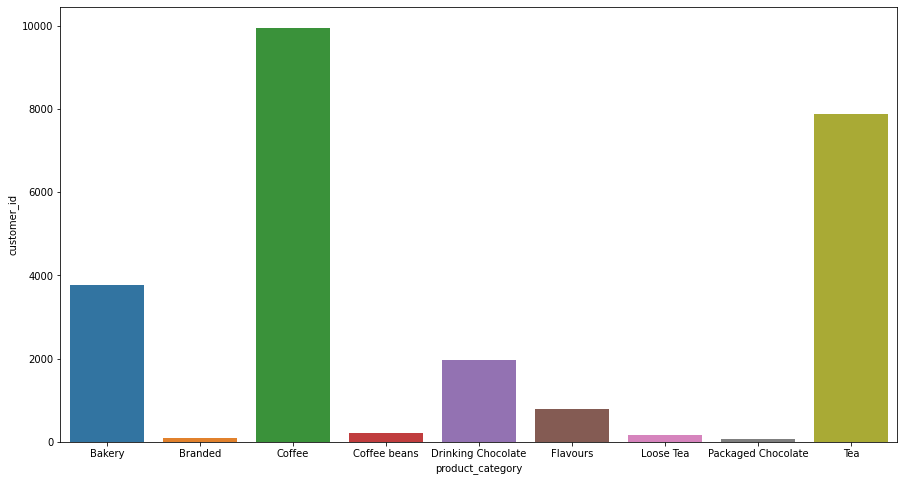

In [215]:
# membuat barplot yang menginterpretasikan frekuensi jumlah pembelian berdasarkan kategori produk yang dibeli 
plt.figure(figsize=(15,8))
graf3 = sns.barplot(data=prod_cat, x='product_category', y='customer_id')
plt.show()

In [216]:
# membuat variabel yang berisikan jumlah pembelian berdasarkan tipe produk yang dibeli
prod_type = pd.DataFrame(total_trx.groupby(['product_type'])['customer_id'].count())

In [217]:
# mengecek variabel
prod_type

,customer_id
product_type,
Barista Espresso,2765
Biscotti,945
Black tea,42
Brewed Black tea,1967
Brewed Chai tea,2990
Brewed Green tea,999
Brewed herbal tea,1910
Chai tea,55
Clothing,25


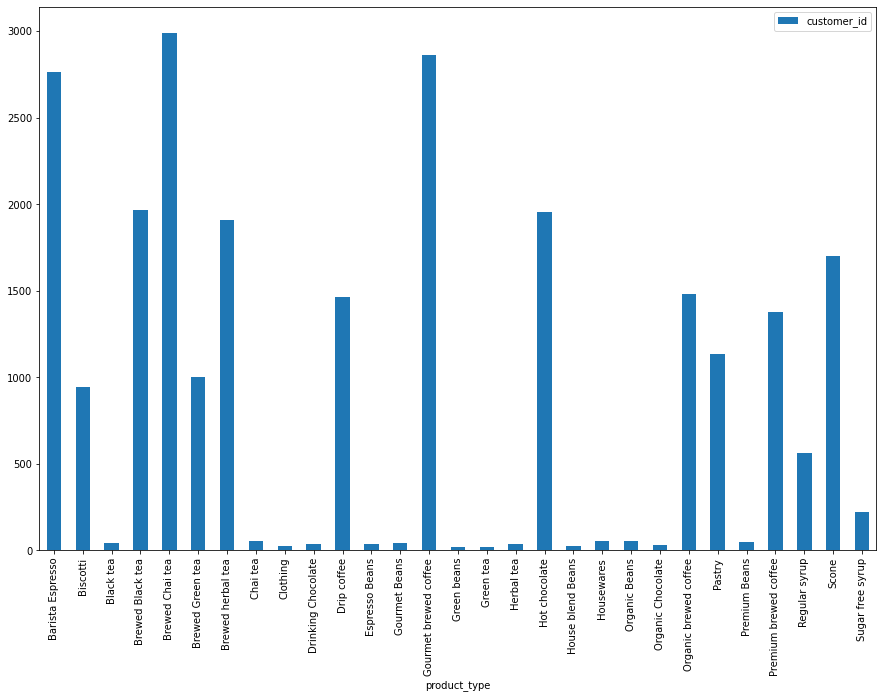

In [218]:
# membuat barplot yang menginterpretasikan frekuensi jumlah pembelian berdasarkan tipe produk
prod_type.plot(kind = 'bar',figsize = (15,10))

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Top purchase oleh customer berdasarkan grup produk yakni grup produk beverages atau minuman
> - Sedangkan berdasarkan kategori produk, top purchase oleh customer yakni kopi
> - Dan untuk tipe produk sendiri, top purchase oleh customer yakni Brewed Chai Tea. Sedangkan di posisi kedua & ketiga tipe produk yakni Gourmet brewed coffee & Barista Espresso

2. Rata-rata kategori produk apa yang paling banyak dibeli oleh para customer?

Berfokus pada rata-rata kategori produk yang paling banyak dibeli secara keseluruhan & berdasarkan store

In [219]:
total_trx.head(3)

,customer_id,transaction_date,store_address,store_city,product_group,product_category,product_type,product,quantity,unit_price,instore_yn,promo_item_yn,new_product_yn,gender,birth_year
0,558,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Chai tea,Traditional Blend Chai Rg,1,2.5,0,0,0,F,1983
1,781,2019-04-01,32-20 Broadway,Long Island City,Beverages,Coffee,Organic brewed coffee,Brazilian Lg,2,3.5,0,0,0,N,1991
2,788,2019-04-01,32-20 Broadway,Long Island City,Beverages,Tea,Brewed Green tea,Serenity Green Tea Rg,2,2.5,1,0,0,N,1995


In [220]:
# membuat variabel yang berisikan rata-rata pembelian berdasarkan kategori produk & store address
prod_cat_str_me = pd.DataFrame(total_trx.groupby(by= ['store_address','product_category'], dropna=True)['quantity'].mean())

In [221]:
# mengecek variabel
prod_cat_str_me

quantity
store_address     product_category            
100 Church Street Bakery              1.024948
                  Branded             1.027027
                  Coffee              1.578522
                  Coffee beans        1.013889
                  Drinking Chocolate  1.565428
                  Flavours            1.640884
                  Loose Tea           1.000000
                  Packaged Chocolate  1.000000
                  Tea                 1.592849
32-20 Broadway    Bakery              1.039339
                  Branded             1.000000
                  Coffee              1.472706
                  Coffee beans        1.000000
                  Drinking Chocolate  1.462988
                  Flavours            1.537572
                  Loose Tea           1.000000
                  Packaged Chocolate  1.000000
                  Tea                 1.473665
687 9th Avenue    Bakery              1.002814
                  Branded             1.000000
                  Coffee              1.508383
                  Coffee beans        1.076087
                  Drinking Chocolate  1.510961
                  Flavours            1.510121
                  Loose Tea           1.000000
                  Packaged Chocolate  1.000000
                  Tea                 1.502648

In [222]:
# mereset index variabel
prod_cat_str_me = prod_cat_str_me.reset_index()

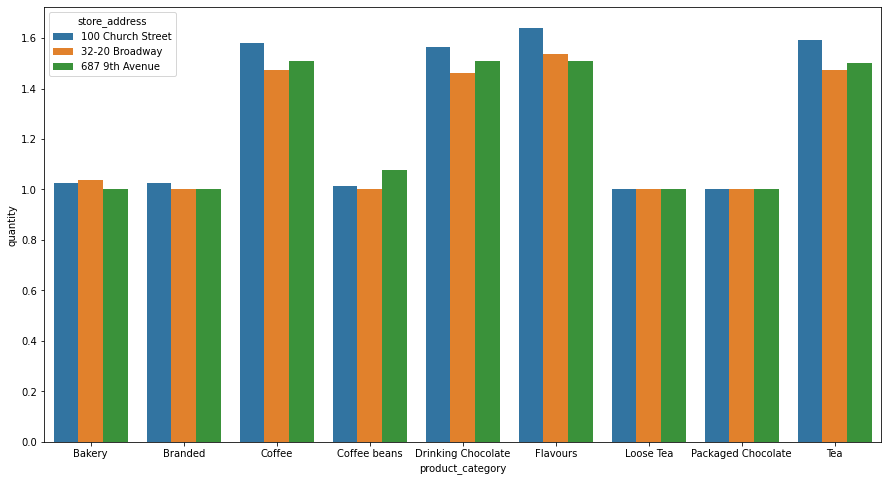

In [223]:
# membuat barplot yang menginterpretasikan frekuensi rata-rata pembelian kategori produk berdasarkan store address
plt.figure(figsize=(15,8))
graf5 = sns.barplot(data=prod_cat_str_me, x='product_category', y='quantity', hue='store_address')
plt.show()

In [224]:
# membuat variabel yang berisikan rata-rata pembelian berdasarkan kategori produk yang dibeli (secara keseluruhan)
prod_cat_me = pd.DataFrame(total_trx.groupby(by= ['product_category'], dropna=True)['quantity'].mean())

In [225]:
# mengecek variabel
prod_cat_me

,quantity
product_category,
Bakery,1.023545
Branded,1.012195
Coffee,1.519602
Coffee beans,1.036866
Drinking Chocolate,1.509974
Flavours,1.576726
Loose Tea,1.000000
Packaged Chocolate,1.000000
Tea,1.522121


In [226]:
# mereset index variabel
prod_cat_me = prod_cat_me.reset_index()

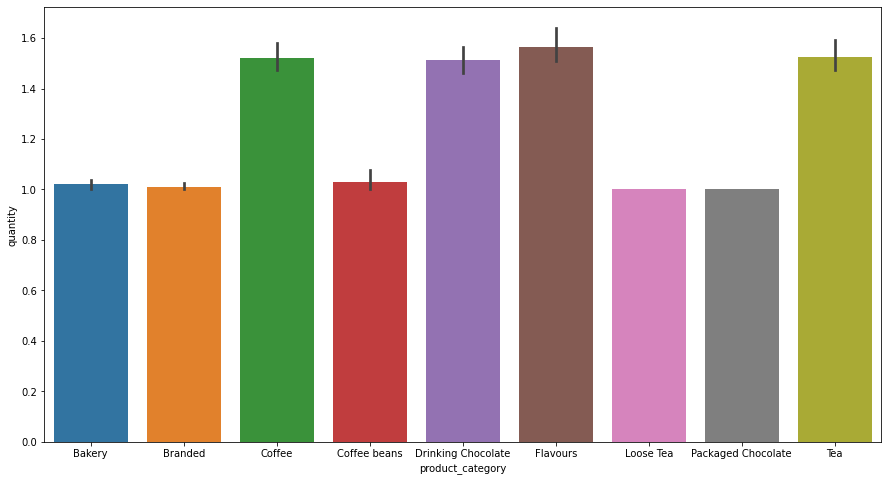

In [227]:
# membuat barplot yang menginterpretasikan frekuensi rata-rata pembelian kategori produk secara keseluruhan
plt.figure(figsize=(15,8))
graf14 = sns.barplot(data=prod_cat_str_me, x='product_category', y='quantity')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Rata-rata kategori produk yang paling banyak dibeli oleh para customer secara keseluruhan yakni kategori produk Flavours, Coffee, & drinking Chocolate
> - Rata-rata kategori produk yang paling banyak dibeli oleh para customer berdasarkan store 100 Church Street & 32-20 Broadway yakni kategori produk Flavours
> - Rata-rata kategori produk yang paling banyak dibeli oleh para customer berdasarkan store 687 9th Avenue yakni kategori produk Coffee


3. Produk apa sajakah yang menjadi Top 3 dibeli oleh para customer?

In [228]:
# membuat variabel yang berisikan jumlah pembelian berdasarkan produk yang dibeli
prod_main = pd.DataFrame(total_trx.groupby(by= ['product'], dropna=True)['customer_id'].count())

In [229]:
# mengecek variabel
prod_main

,customer_id
product,
Almond Croissant,317
Brazilian - Organic,27
Brazilian Lg,471
Brazilian Rg,497
Brazilian Sm,515
...,...
Sustainably Grown Organic Lg,516
Sustainably Grown Organic Rg,493
Traditional Blend Chai,22


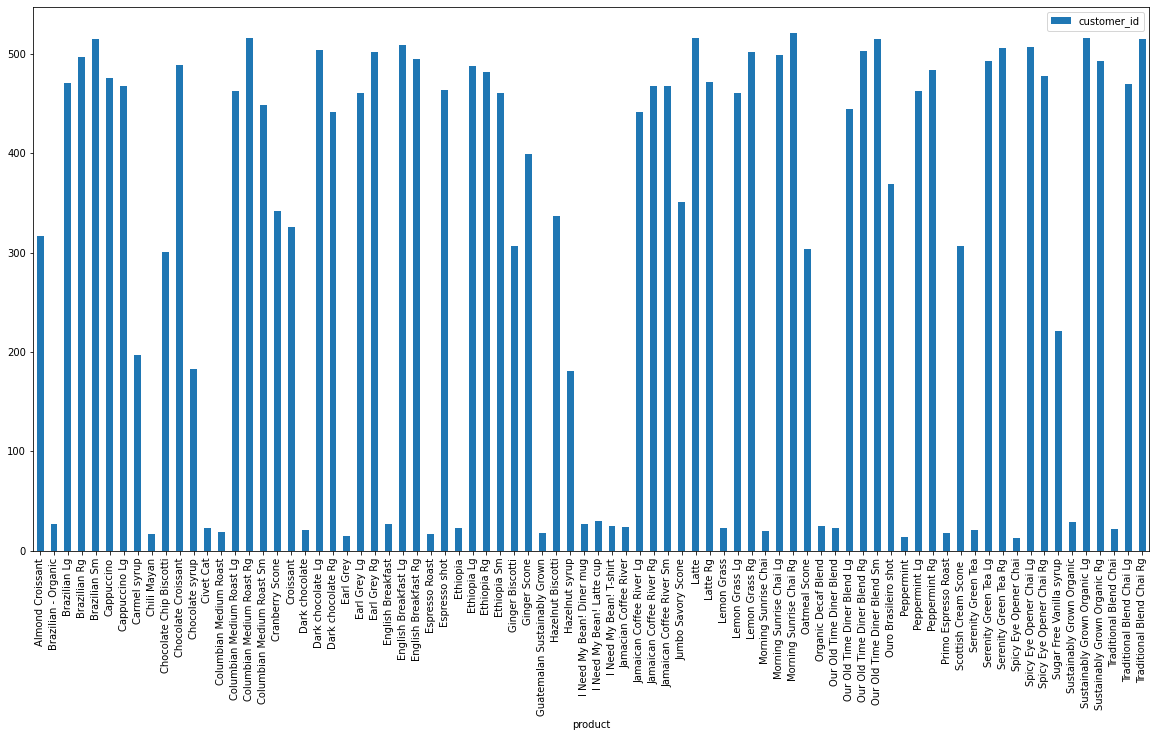

In [230]:
# membuat barplot yang menginterpretasikan jumlah pembelian berdasrkan produk yang dibeli
prod_main.plot(kind='bar', figsize= (20, 10))

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Produk yang menjadi top 3 terbanyak dibeli oleh para customer secara berurut yakni produk Morning Sunrise Chai Rg, Sustainably Grown Organic Lg, & Brazilian Sm

4. Produk apa yang menjadi produk terlaris berdasarkan masing-masing store?

Berfokus pada kategori produk & produk utama yang terlaris dibeli berdasarkan masing-masing store

In [231]:
# membuat variabel yang berisikan jumlah pembelian berdasarkan kategori produk yang dibeli berdasarkan store address
prod_cat_str = pd.DataFrame(total_trx.groupby(by= ['store_address','product_category'], dropna=True)['customer_id'].count())

In [232]:
# mengecek variabel
prod_cat_str

customer_id
store_address     product_category               
100 Church Street Bakery                     1443
                  Branded                      37
                  Coffee                     3343
                  Coffee beans                 72
                  Drinking Chocolate          619
                  Flavours                    362
                  Loose Tea                    47
                  Packaged Chocolate           21
                  Tea                        2601
32-20 Broadway    Bakery                     1271
                  Branded                      32
                  Coffee                     3444
                  Coffee beans                 53
                  Drinking Chocolate          743
                  Flavours                    173
                  Loose Tea                    44
                  Packaged Chocolate           23
                  Tea                        2810
687 9th Avenue    Bakery                     1066
                  Branded                      13
                  Coffee                     3161
                  Coffee beans                 92
                  Drinking Chocolate          593
                  Flavours                    247
                  Loose Tea                    64
                  Packaged Chocolate           23
                  Tea                        2455

In [233]:
# mereset index variabel
prod_cat_str = prod_cat_str.reset_index()

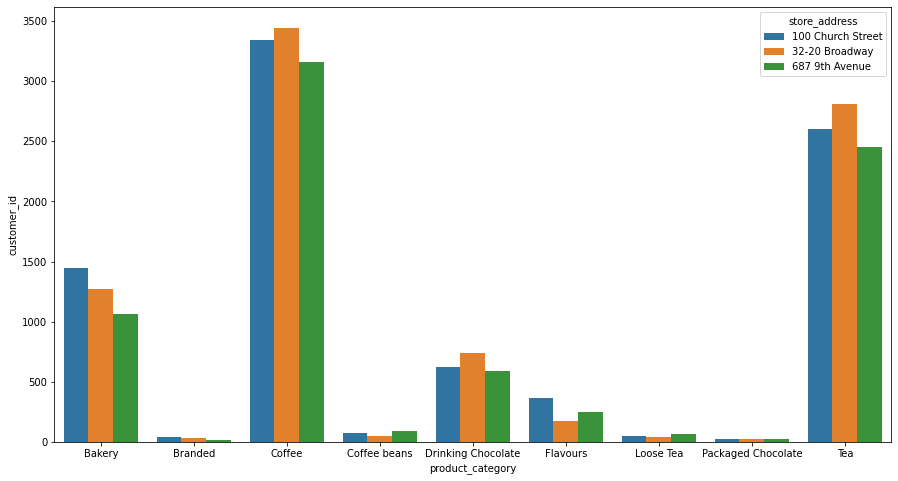

In [234]:
# melmbuat barplot yang menginterpretasikan jumlah pembelian berdasarkan kategori produk yang dibeli di masing-masing store address
plt.figure(figsize=(15,8))
graf6 = sns.barplot(data=prod_cat_str, x='product_category', y='customer_id', hue='store_address')
plt.show()

In [235]:
# membuat variabel yang berisikan jumlah pembelian berdasarkan produk yang dibeli di masing-masing store address
prod_str = pd.DataFrame(total_trx.groupby(by= ['store_address','product'], dropna=True)['customer_id'].count())

In [236]:
# mengecek variabel
prod_str

customer_id
store_address     product                                  
100 Church Street Almond Croissant                      111
                  Brazilian - Organic                    11
                  Brazilian Lg                          163
                  Brazilian Rg                          165
                  Brazilian Sm                          176
...                                                     ...
687 9th Avenue    Sustainably Grown Organic Lg          180
                  Sustainably Grown Organic Rg          142
                  Traditional Blend Chai                  9
                  Traditional Blend Chai Lg             149
                  Traditional Blend Chai Rg             161

[239 rows x 1 columns]

In [237]:
# mereset index variabel
prod_str = prod_str.reset_index()

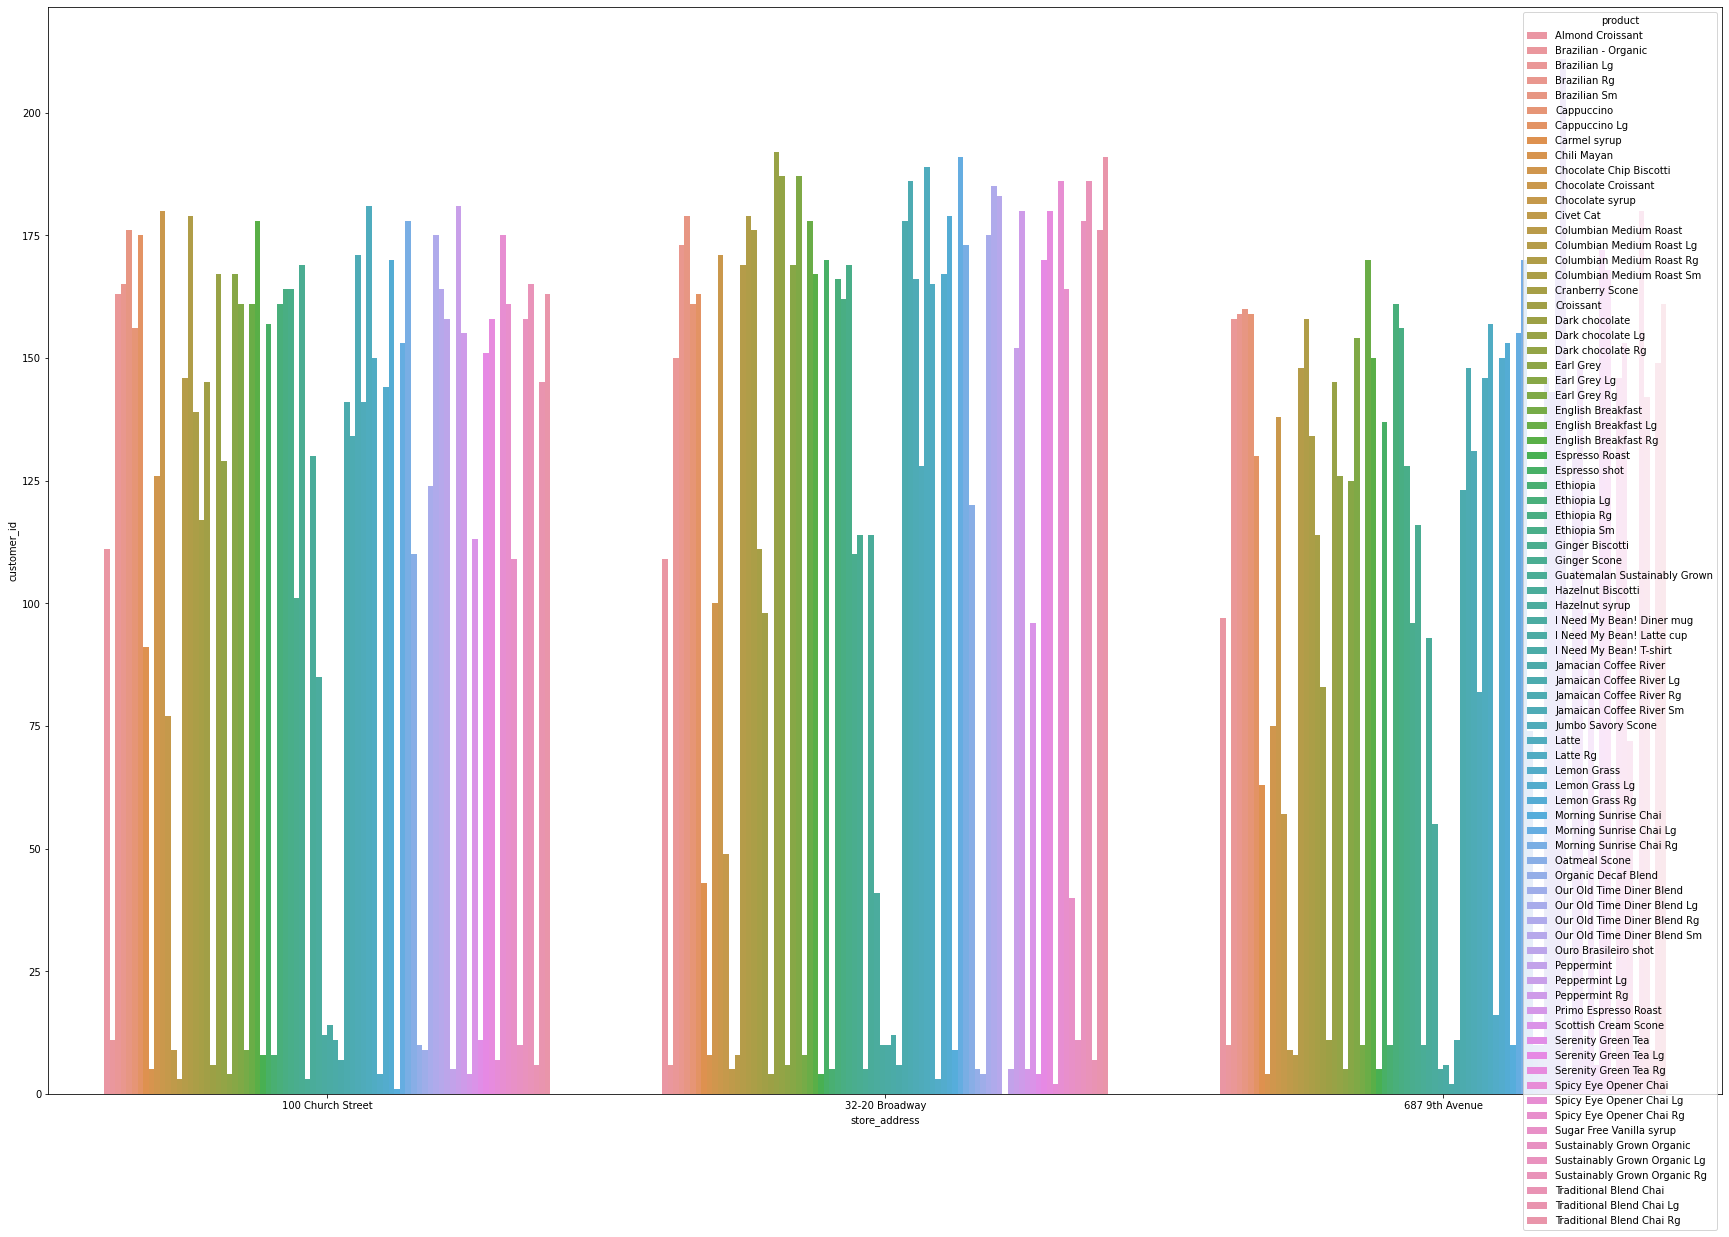

In [238]:
# membuat barplot yang menginterpretasikan frekuensi jumlah pembelian berdasarkan produk yang dibeli di masing-masing store
plt.figure(figsize=(30,20))
graf7 = sns.barplot(data=prod_str, x='store_address', y='customer_id', hue='product')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Produk kategori terlaris di masing-masing store yakni seluruhnya sama-sama produk kategori kopi
> - Produk paling laris di store 100 Church street yakni Latte.
> - Produk paling laris di store 32-20 Broadway yakni Morning Sunrise Chai Lg.
> - Produk paling laris di store 687 9th Avenue yakni Ouro Brasileiro shot.

5. Berdasarkan harga produknya, kategori produk apa yang paling banyak dibeli oleh customer?

In [239]:
# membuat variabel yang berisikan jumlah pembelian berdasarkan kategori produk yang dibeli & harganya
prod_cat_price = pd.DataFrame(total_trx.groupby(by= ['unit_price','product_category'], dropna=True)['customer_id'].count())

In [240]:
# mengecek variabel
prod_cat_price

customer_id
unit_price product_category               
0.80       Flavours                    782
2.00       Coffee                      964
2.10       Coffee                       99
2.20       Coffee                      976
2.45       Coffee                      468
2.50       Coffee                     1019
           Tea                        3525
2.55       Tea                         478
2.65       Bakery                       51
3.00       Bakery                      304
           Coffee                     2621
           Tea                        2857
3.10       Coffee                      468
           Tea                         507
3.25       Bakery                     1018
3.50       Bakery                      928
           Coffee                      959
           Drinking Chocolate          442
3.75       Bakery                     1151
           Coffee                     1434
           Drinking Chocolate          493
4.00       Tea                         499
4.06       Bakery                        9
4.25       Coffee                      940
4.38       Bakery                        6
4.50       Bakery                      305
           Drinking Chocolate          504
4.69       Bakery                        6
4.75       Drinking Chocolate          516
5.63       Bakery                        2
6.40       Packaged Chocolate           21
7.60       Packaged Chocolate           29
8.95       Loose Tea                   101
9.25       Loose Tea                    21
9.50       Loose Tea                    20
10.00      Coffee beans                 18
10.95      Loose Tea                    13
12.00      Branded                      25
           Coffee beans                  2
13.33      Packaged Chocolate           17
14.00      Branded                      28
14.75      Coffee beans                 17
15.00      Coffee beans                 19
18.00      Coffee beans                 50
19.75      Coffee beans                 24
20.45      Coffee beans                 18
21.00      Coffee beans                 23
22.50      Coffee beans                 20
23.00      Branded                       6
           Coffee beans                  2
28.00      Branded                      23
           Coffee beans                  1
45.00      Coffee beans                 23

In [241]:
# mereset index variabel
prod_cat_price = prod_cat_price.reset_index()

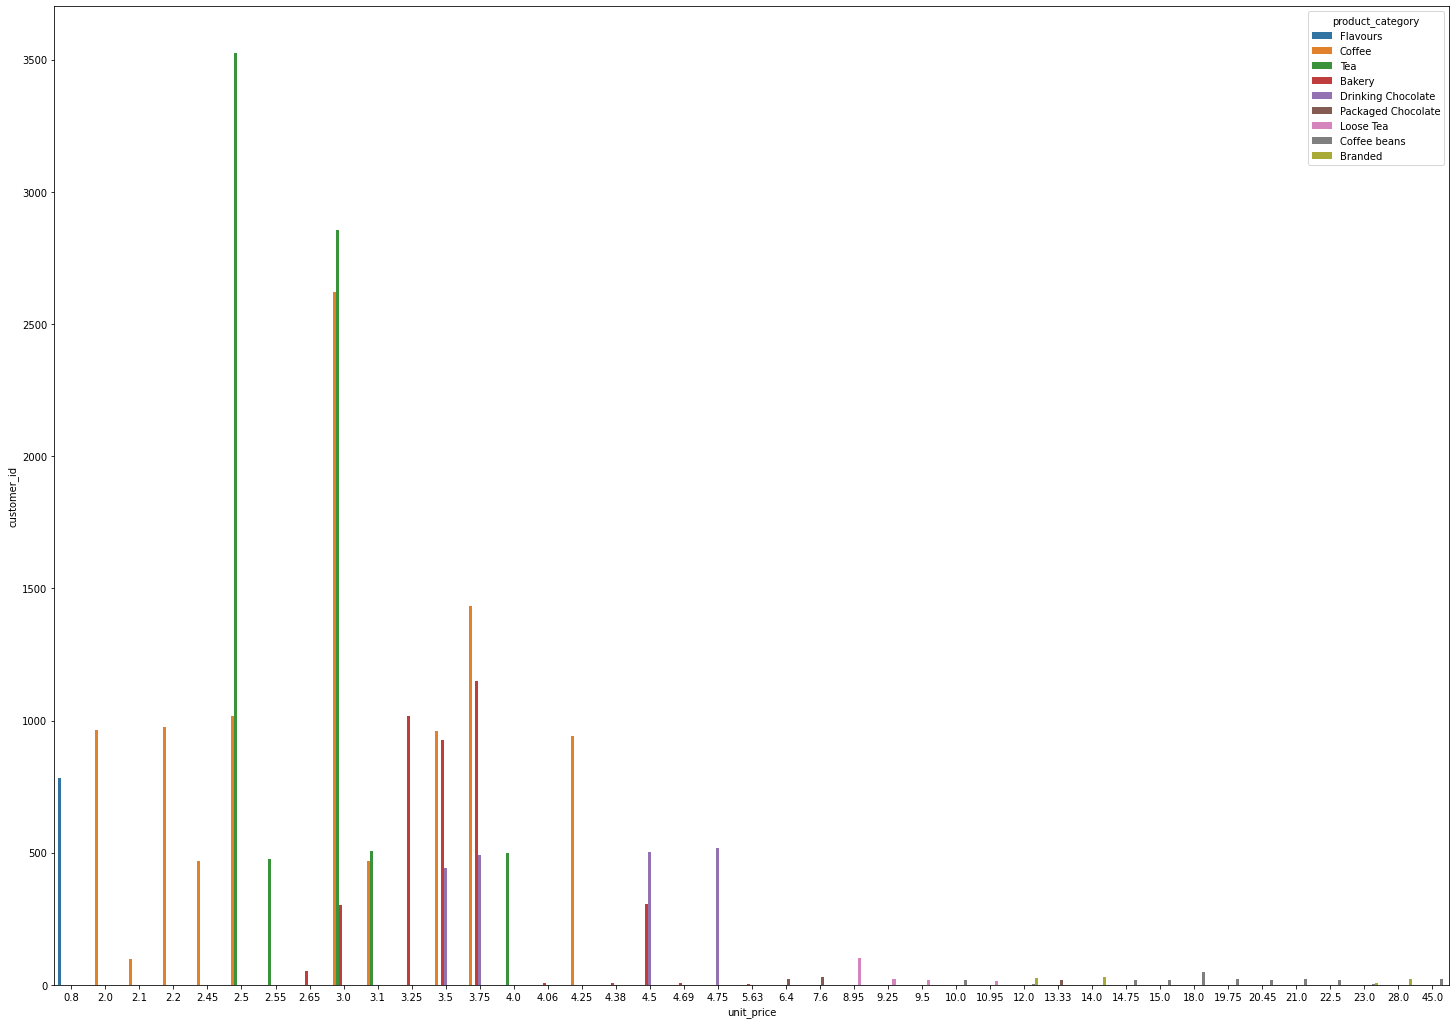

In [242]:
# membuat barplot yang menginterpretasikan frekuensi jumlah pembelian berdasarkan kategori produk yang dibeli & harganya
plt.figure(figsize=(25,18))
graf8 = sns.barplot(data=prod_cat_price, x='unit_price', y='customer_id', hue='product_category')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Para customer paling banyak membeli kategori produk teh dengan harga 2.50 dollar
> - Lalu, disusul dengan kategori produk teh & kopi dengan harga 3.00 dollar

####**D. OPTIMALISASI INVENTORY**

1. Pada tanggal berapakah terjadi persentase waste tertinggi?

In [243]:
inventory

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56
3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%,3.25,81
4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%,3.75,50
...,...,...,...,...,...,...,...,...,...,...,...,...
302,2019-04-27,687 9th Avenue,New York,Hazelnut Biscotti,2.28,$3.50,18,1,17,94%,3.50,94
303,2019-04-27,687 9th Avenue,New York,Cranberry Scone,2.11,$3.25,18,4,14,78%,3.25,78
304,2019-04-27,687 9th Avenue,New York,Chocolate Croissant,2.44,$3.75,18,2,16,89%,3.75,89
305,2019-04-27,687 9th Avenue,New York,Ginger Scone,2.11,$3.25,48,19,29,60%,3.25,60


In [244]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan tanggal transaksi
inventory_wastebydate = pd.DataFrame(inventory.groupby(by= ['transaction_date'], dropna=False)[['waste_percentage', 'waste']].max())

In [245]:
# mengecek variabel
inventory_wastebydate

,waste_percentage,waste
transaction_date,,
2019-04-01,81,39
2019-04-02,79,38
2019-04-03,81,39
2019-04-04,79,38
2019-04-05,0,0
2019-04-06,52,25
2019-04-07,92,47
2019-04-08,94,45
2019-04-09,94,44


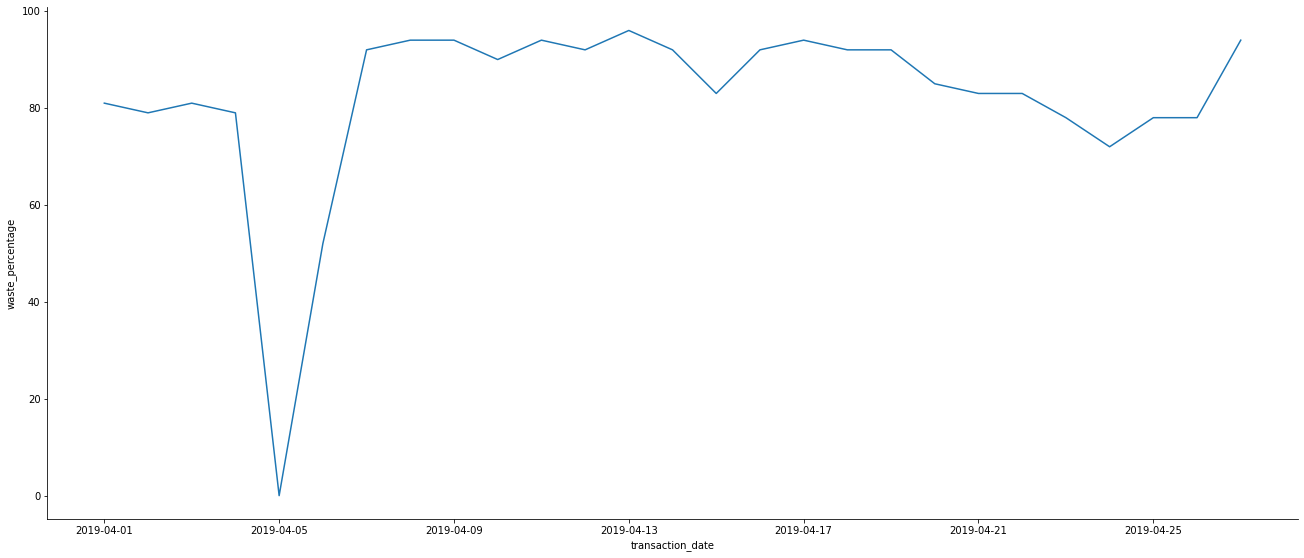

In [246]:
# membuat line plot yang menginterpretasikan frekuensi jumlah persentase tertinggi berdasarkan tanggal transaksi
graf9 = sns.relplot(x="transaction_date", y="waste_percentage", kind="line", data=inventory_wastebydate)
graf9.fig.set_size_inches(20,8)

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Persentase waste tertinggi terjadi pada tanggal 13 April 2019 dengan persentase waste sebesar 96% & jumlah waste sebanyak 46 produk
> - Terjadi kenaikan persentase waste selama bulan April 2019 di beberapa inventory outlet coffee shop

2. Product apakah yang memiliki persentase waste tertinggi?

In [247]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan produk
inventory_wasteprod = pd.DataFrame(inventory.groupby(by= ['product'], dropna=False)[['waste_percentage', 'waste']].max())

In [248]:
# mengecek variabel
inventory_wasteprod

,waste_percentage,waste
product,,
Almond Croissant,94,17
Chocolate Croissant,89,16
Cranberry Scone,83,15
Ginger Scone,96,47
Hazelnut Biscotti,94,17


In [249]:
# mencari rata-rata dari persentase waste tertinggi
inventory_wasteprod.mean()

waste_percentage    91.2
waste               22.4
dtype: float64

In [250]:
# mereset index variabel
inventory_wasteprod = inventory_wasteprod.reset_index()

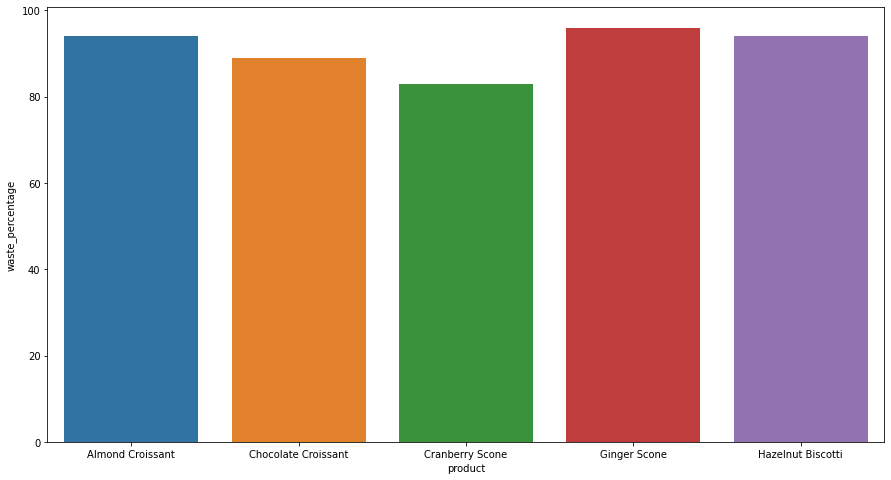

In [251]:
# membuat barplot yang menginterpretasikan frekuensi jumlah waste tertinggi berdasarkan produk
plt.figure(figsize=(15,8))
graf10 = sns.barplot(data=inventory_wasteprod, x='product', y='waste_percentage')
plt.show()

> Berdasarkan temuan di atas, dapat diketahui bahwa:
> - Produk yang memiliki persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk
> - Lalu, persentase waste tertinggi disusul dengan produk Almond Croissant & Hazelnut Biscotti yang sama-sama memiliki persentase waste sebesar 94% & jumlah waste sebanyak 17 buah produk
> - Rata-rata persentase waste tertinggi dari masing-masing produk sebesar 91.2% 

3. Berapakah persentase waste tertinggi berdasarkan store city & address?

In [252]:
# membuat variabel yang berisikan jumlah persentase waste tertinggi berdasarkan store city & store address
inventory_wasteoutlet = pd.DataFrame(inventory.groupby(by= ['store_city', 'store_address'], dropna=True)[['waste_percentage', 'waste']].max())

In [253]:
# mengecek variabel
inventory_wasteoutlet

waste_percentage  waste
store_city       store_address                             
Long Island City 32-20 Broadway                   94     44
New York         100 Church Street                94     45
                 687 9th Avenue                   96     47

In [254]:
# mereset index variabel
inventory_wasteoutlet = inventory_wasteoutlet.reset_index()

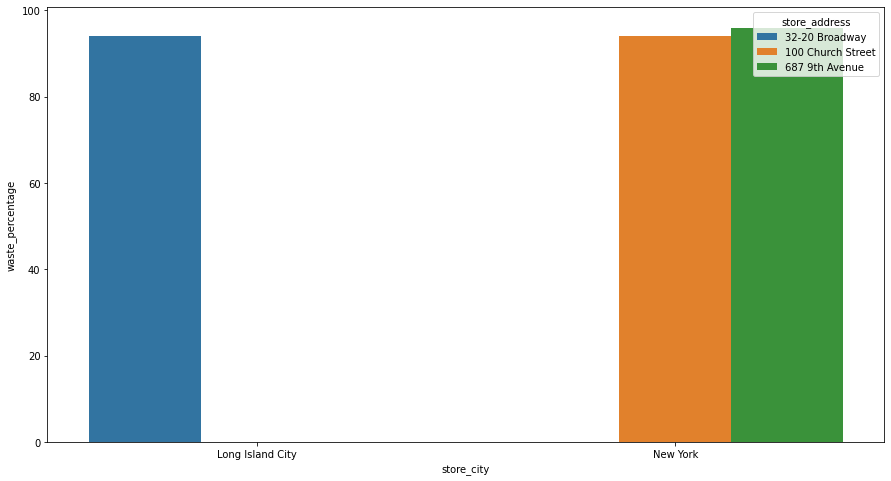

In [255]:
# membuat barplot yang menginterpretasikan frekuensi jumlah persentase waste tertinggi berdasarkan store city & store address
plt.figure(figsize=(15,8))
graf11 = sns.barplot(data=inventory_wasteoutlet, x='store_city', y='waste_percentage', hue='store_address')
plt.show()

> Berdasarkan temuan di atas, dapat diketahui bahwa:
> - Persentase waste tertinggi berdasarkan store city & address yakni store di New York dengan alamat 687 9th Avenue, dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk


4. Berapa banyak nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi?

In [256]:
inventory.head(5)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56
3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%,3.25,81
4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%,3.75,50


In [257]:
# membuat kolom baru yang berisikan total pemasukan dari penjualan
inventory['sold_value'] = inventory['quantity_sold'] * inventory['current_retail_price_value']

In [258]:
# membuat kolom baru yang berisikan target pemasukan dari total penjualan
inventory['target_trx'] = inventory['start_of_day'] * inventory['current_retail_price_value']

In [259]:
# membuat kolom baru yang berisikan kerugian yang didapatkan dari penjualan yang tersisa
inventory['waste_value'] = inventory['target_trx'] - inventory['sold_value']

In [260]:
# mengecek penambahan kolom 
inventory.head(5)

,transaction_date,store_address,store_city,product,current_wholesale_price,current_retail_price,start_of_day,quantity_sold,waste,% waste,current_retail_price_value,waste_percentage,sold_value,target_trx,waste_value
0,2019-04-01,32-20 Broadway,Long Island City,Hazelnut Biscotti,2.28,$3.50,18,8,10,56%,3.50,56,28.00,63.0,35.00
1,2019-04-01,32-20 Broadway,Long Island City,Cranberry Scone,2.11,$3.25,18,12,6,33%,3.25,33,39.00,58.5,19.50
2,2019-04-01,32-20 Broadway,Long Island City,Chocolate Croissant,2.44,$3.75,18,8,10,56%,3.75,56,30.00,67.5,37.50
3,2019-04-01,32-20 Broadway,Long Island City,Ginger Scone,2.11,$3.25,48,9,39,81%,3.25,81,29.25,156.0,126.75
4,2019-04-01,32-20 Broadway,Long Island City,Almond Croissant,2.44,$3.75,18,9,9,50%,3.75,50,33.75,67.5,33.75


In [261]:
# membuat variabel yang berisikan jumlah total kerugian & persentase waste tertinggi
inventory_wastevalue = pd.DataFrame(inventory.groupby(by= ['product'], dropna=True)[['waste_percentage', 'waste_value']].max())

In [262]:
# mengecek variabel
inventory_wastevalue

,waste_percentage,waste_value
product,,
Almond Croissant,94,63.75
Chocolate Croissant,89,60.00
Cranberry Scone,83,48.75
Ginger Scone,96,152.75
Hazelnut Biscotti,94,63.00


In [263]:
# mencari rata-rata kerugian dari persentase waste tertinggi
inventory_wastevalue.mean()

waste_percentage    91.20
waste_value         77.65
dtype: float64

In [264]:
# mereset index variabel
inventory_wastevalue = inventory_wastevalue.reset_index()

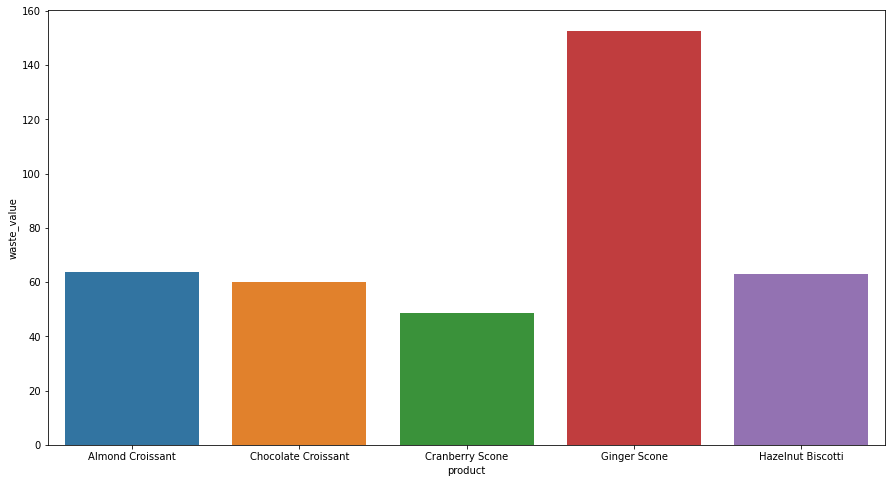

In [265]:
# membuat barplot yang menginterpretasikan frekuensi total kerugian dari masing-masing produk dengan persentase waste tertinggi
plt.figure(figsize=(15,8))
graf12 = sns.barplot(data=inventory_wastevalue, x='product', y='waste_value')
plt.show()

> Berdasarkan hasil temuan di atas, dapat diketahui bahwa:
> - Nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% memiliki nilai kerugian sebesar $152.75
> - Range nilai kerugian yang dimiliki oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 48.75 - 152.75 dollar, dengan rata-rata kerugian yang dihasilkan oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 77.65

**MENGEKSPORT DATA:**

Eksport data (yang sudah fix & clean) ditujukan untuk data dapat divisualisasikan lebih lanjut & dipresentasikan di dalam tableau

In [266]:
cust_merge3.to_csv(path + 'Profiling Customer Coffee Shop Clean.csv')

In [267]:
total_trx.to_csv(path + 'Total Transaksi Customer Coffee Shop Clean.csv')

In [268]:
inventory.to_csv(path + 'Inventory Coffee Shop Clean.csv')

## REKOMENDASI

####A. PROFILING CUSTOMER

Profiling customer dilakukan dengan berfokus kepada segmentasi generasi & gender dari masing-masing customer (member coffee shop)

**Berdasarkan hasil analisis terhadap problem statement terkait profiling customer pada proses EDA yang dilakukan di atas sebelumnya, berikut rangkuman hasil insight yang didapatkan**:
- Yang menjadi top 3 generasi terbanyak yakni Baby Boomers, Gen X, & Older Millenials.
- Rata-rata usia customer secara keseluruhan yakni berusia 40.6 tahun. Sedangkan rata-rata usia customer berdasarkan home store yang dikunjungi didapatkan variasi rata-rata yakni antara 38.1 hingga 43.6 tahun. 
- Jenis kelamin terbanyak dari customer yakni female / wanita.

- Jenis customer yang gemar melakukan purchasing di coffee shop & juga paling gemar membeli kopi yakni customer dengan generasi Gen X dan berjenis kelamin wanita.

- Customer yang paling suka menggunakan promo yakni customer dengan generasi Baby Boomers & berjenis kelamin pria dengan pengguna promo sebanyak 36 customer.
- Selain itu, dijumpai pula bahwa lebih banyak customer yang tidak menggunakan promo item dibandingkan yang menggunakan promo item
- Dan customer yang paling banyak tidak menggunakan promo item yakni customer dengan generasi Gen X & berjenis kelamin wanita

- Perbandingan rasio antara customer yang membeli langsung (in store) dengan yang tidak membeli langsung terlampau sedikit.
- Adapun ditemukan bahwa customer terbanyak yang membeli langsung (in store),yakni customer dengan generasi Baby Boomers & berjenis kelamin wanita. Sedangkan customer terbanyak yang membeli tidak langsung (not in store), yakni customer dengan generasi Gen X & berjenis kelamin wanita.

- Dari keseluruhan customer tidak ada satu pun customer yang membeli new product item.

> **REKOMENDASI**:
- Membuat produk baru (new product item) yang merupakan kategori kopi untuk menaikkan purchasing new product item
- Membuat promo khusus produk kopi & pembelian di tempat (in store) untuk menarik customer secara menyeluruh untuk membeli dan menaikkan purchasing menggunakan promo
- Membuat promo khusus produk kopi & pembelian tidak di tempat (not in store / online) untuk menarik customer wanita di generasi Gen X untuk membeli dan menaikkan purchasing menggunakan promo
- Membuat promo event 'ladies night' / 'happy hour' di tempat (in store) untuk setiap pembelian produk kopi untuk menarik customer wanita untuk melakukan purchasing lebih sering

####B. TRANSAKSI PENJUALAN

**Berdasarkan hasil analisis terhadap problem statement terkait transaksi penjualan pada proses EDA yang dilakukan di atas sebelumnya, berikut rangkuman hasil insight yang didapatkan**:
- Transaksi terbanyak terjadi pada tanggal 3 April 2019
- Terjadi penurunan angka transaksi di coffee shop selama bulan April tahun 2019
- Transaksi oleh customer yang membeli promo item paling banyak, terjadi pada tanggal 24 April 2019 sebesar 28 customer (dari total 625).
- Dari keseluruhan transaksi, banyak dilakukan pembelian tanpa membeli promo item.
- Transaksi pembelian oleh customer paling banyak dilakukan di kota New York
- Sedangkan berdasarkan alamat outlet, transaksi pembelian oleh customer paling banyak dilakukan di outlet yang beralamatkan 32-20 broadway, Long Island city
- Transaksi yang dilakukan di tempat (in store) oleh customer lebih banyak dibandingkan yang tidak di tempat (not in store / online) yakni sejumlah 12445 customer
- Selisih antara jumlah customer yang membeli langsung (in store) dengan customer yang membeli tidak langsung / di tempat terpaut sedikit

> **REKOMENDASI**:
- Berdasarkan insight dari profiling customer & transaksi penjualan di atas, direkomendasikan membuat promo di seluruh gerai coffee shop setiap pembelian kopi di tempat (in store) maupun online, untuk menarik minat customer (secara keseluruhan) agar menaikkan nilai transaksi & menaikkan nilai purchasing promo item

####C. PRODUCT RECOMMENDATION

**Berdasarkan hasil analisis terhadap problem statement terkait product recommendation pada proses EDA yang dilakukan di atas sebelumnya, berikut rangkuman hasil insight yang didapatkan**:
- Top purchase oleh customer berdasarkan grup produk yakni grup produk beverages atau minuman. Sedangkan berdasarkan kategori produk, top purchase yakni kopi. Dan untuk tipe produk sendiri, top purchase yakni Brewed Chai Tea, sedangkan di posisi kedua & ketiga top purchase tipe produk yakni Gourmet brewed coffee & Barista Espresso.

- Rata-rata kategori produk yang paling banyak dibeli oleh para customer berdasarkan store 100 Church Street & 32-20 Broadway yakni kategori produk Flavours.
- Rata-rata kategori produk yang paling banyak dibeli oleh para customer berdasarkan store 687 9th Avenue yakni kategori produk Coffee.
- Produk yang menjadi top 3 terbanyak dibeli oleh para customer secara berurut yakni produk Morning Sunrise Chai Rg, Sustainably Grown Organic Lg, & Brazilian Sm.
- Produk kategori terlaris di masing-masing store yakni seluruhnya sama-sama produk kategori kopi.
- Produk paling laris di store 100 Church street yakni Latte.
- Produk paling laris di store 32-20 Broadway yakni Morning Sunrise Chai Lg.
- Produk paling laris di store 687 9th Avenue yakni Ouro Brasileiro shot.
- Berdasarkan satuan harga, para customer paling banyak membeli kategori produk teh dengan harga 2.50 dollar. Lalu, disusul dengan kategori produk teh & kopi dengan harga 3.00 dollar.

> **REKOMENDASI**:
- Membuat produk minuman baru dengan kategori kopi dengan harga berkisar antara 2.50 - 3.00 dollar.
- Membuat promo harian untuk setiap pembelian produk Morning Sunrise Chai Rg / Sustainably Grown Organic Lg / Brazilian Sm di seluruh store.
- Untuk store 100 Church street, membuat promo bulanan untuk setiap pembelian kategori produk kopi / setiap pembelian produk Latte.
- Untuk store 32-20 Broadway, membuat promo bulanan untuk setiap pembelian kategori produk kopi / setiap pembelian produk Morning Sunrise Chai Lg.
- Untuk store 687 9th Avenue, membuat promo bulanan untuk setiap pembelian kategori produk kopi / setiap pembelian produk Ouro Brasileiro shot.

####D. OPTIMALISASI INVENTORY

**Berdasarkan hasil analisis terhadap problem statement terkait optimalisasi inventory pada proses EDA yang dilakukan di atas sebelumnya, berikut rangkuman hasil insight yang didapatkan**:
- Persentase waste tertinggi terjadi pada tanggal 13 April 2019 dengan persentase waste sebesar 96% & jumlah waste sebanyak 46 produk.

- Terjadi kenaikan persentase waste inventory selama bulan April 2019 di beberapa store coffee shop.
- Produk yang memiliki persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk. Lalu, disusul dengan produk Almond Croissant & Hazelnut Biscotti yang sama-sama memiliki persentase waste sebesar 94% & jumlah waste sebanyak 17 buah produk.Dan rata-rata persentase waste tertinggi dari masing-masing produk sebesar 91.2%.
- Persentase waste tertinggi berdasarkan store city & address yakni store di New York dengan alamat 687 9th Avenue, dengan persentase waste sebesar 96% & jumlah waste sebanyak 47 buah produk
- Nilai kerugian yang dimiliki oleh produk dengan persentase waste tertinggi yakni produk Ginger Scone dengan persentase waste sebesar 96% memiliki nilai kerugian sebesar $152.75. Adapun range nilai kerugian yang dimiliki oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 48.75 - 152.75 dollar, dengan rata-rata kerugian yang dihasilkan oleh masing-masing produk dengan persentase waste tertinggi yakni sebesar 77.65

> **REKOMENDASI:**
- Menetapkan target penjualan (start of day) yang jauh lebih sedikit untuk tiap produk Ginger Scone, Almond Croissant, & Hazelnut Biscotti untuk seluruh store

## KESIMPULAN - Create the story

> - Berdasarkan insight yang telah didapat dari analisis terhadap profiling customer, transaksi penjualan, product recommendation, & optimalisasi inventory, dapat disimpulkan bahwa untuk dapat menaikkan nilai transaksi penjualan direkomendasikan untuk membuat berbagai macam promo, khususnya untuk kategori produk kopi. 
>
> - Adapun promo-promo ini ditujukan untuk seluruh customer & terutama di kalangan customer wanita di generasi Gen X.
Selain itu dapat pula untuk membuat produk minuman baru yang berkategori kopi dengan range harga berkisar $2.50 - 3.00.
>
> - Sedangkan untuk dapat mengoptimalisasikan inventory pada tiap-tiap store direkomendasikan untuk meminimalisir / mengurangi / menetapkan target penjualan yang jauh lebih sedikit pada tiga produk yang menghasilkan persentase waste tertinggi yakni Ginger Scone, Almond Croissant, & Hazelnut Biscotti.